# Capstone Project: Life in the "New Normal"
---

#### Organization of Project Notebooks:
- Notebook #1: [Problem Statement & Webscraping](./01_problem_statement_and_web_scraping.ipynb)
- **Notebook #2: Data Cleaning & Exploratory Data Analysis (current notebook)**
- Notebook #3: Preprocessing & Modelling
    - Notebook #3-1: [Preprocessing & Sentiment Analysis](./03-1_preprocessing_and_sentiment_analysis.ipynb)
    - Notebook #3-2: [Building Pre-trained LSTM RNN Model for Sentiment Analysis](./03-2_building_pretrained_lstm_model.ipynb) 
- Notebook #4: [Topic Modelling & Conclusion](./04_topic_modelling_and_conclusion.ipynb)
- Notebook #5: [Plotly & Dash Visualization](./05_plotly_and_dash.ipynb)

## Notebook #2: Data Cleaning & Exploratory Data Analysis

### Contents
1. [Introduction](#1.-Introduction)
2. [Data Cleaning](#2.-Data-Cleaning)
3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
4. [Further Data Cleaning & Visualization](#4.-Further-Data-Cleaning-&-Visualization)

### 1. Introduction

In this notebook, I will be examining the data obtained from webscraping Twitter in the [earlier notebook](./01_problem_statement_and_web_scraping.ipynb). This includes identifying the pattern of tweets posting over time, distribution of the number of likes, retweets, trending hashtags and words that appear most commonly among the tweets, etc. In addition, new features will be engineered to understand other relationships that may exist.

The data will also be cleaned to aid in the prediction of the tweets' sentiment and topics of discussion that will occur in the upcoming notebooks.

In [1]:
# import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import re

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# import the twitter datasets
tweets_jan2021_df = pd.read_csv('../datasets/sg_tweets_jan_2021.csv')
tweets_feb2021_df = pd.read_csv('../datasets/sg_tweets_feb_2021.csv')
tweets_mar2021_df = pd.read_csv('../datasets/sg_tweets_mar_2021.csv')
tweets_apr2021_df = pd.read_csv('../datasets/sg_tweets_apr_2021.csv')
tweets_may2021_df = pd.read_csv('../datasets/sg_tweets_may_2021.csv')
tweets_jun2021_df = pd.read_csv('../datasets/sg_tweets_jun_2021.csv')
tweets_jul2021_df = pd.read_csv('../datasets/sg_tweets_jul_2021.csv')

### 2. Data Cleaning

In this section, I will be merging all the Twitter datasets into one DataFrame, followed by pre-cleaning the DataFrame and creating new features, so as to conduct an Exploratory Data Analysis to identify trends and patterns. 


### 2.1 Merging Tweets

I will first verify if the Twitter datasets across January to July 2021 contain the same columns, before merging them into one DataFrame for easier analysis.

In [3]:
# store all the twitter datasets
tweets_datasets = [(tweets_jan2021_df, 'SG Tweets January 2021'),
                   (tweets_feb2021_df, 'SG Tweets February 2021'),
                   (tweets_mar2021_df, 'SG Tweets March 2021'),
                   (tweets_apr2021_df, 'SG Tweets April 2021'),
                   (tweets_may2021_df, 'SG Tweets May 2021'),
                   (tweets_jun2021_df, 'SG Tweets June 2021'),
                   (tweets_jul2021_df, 'SG Tweets July 2021')]

In [4]:
# view the first five rows
for df, name in tweets_datasets:
    print(f'Displaying the first five rows of {name} dataset:')
    print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')
    display(df.head())
    print()

Displaying the first five rows of SG Tweets January 2021 dataset:
There are 104759 rows and 12 columns.


,Unnamed: 0,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near
0,0,1355667088874958850,2021-01-31 07:59:55,"-3.811332,-38.486263 #Larvitar 💯✨🤞 891",und,['larvitar'],1269471373912535040,AuraGuardians2,4,0,0,Singapore
1,1,1355666922210164738,2021-01-31 07:59:15,@zettodot Haha! I know who you feel!,en,[],1269471373912535040,AuraGuardians2,1,0,0,Singapore
2,2,1355666801586302976,2021-01-31 07:58:47,"51.750034,0.482069 #Larvitar 💯✨🤞 832",und,['larvitar'],1269471373912535040,AuraGuardians2,3,0,0,Singapore
3,3,1355666512946716673,2021-01-31 07:57:38,@sugannjr HAHAHAHAHHAAHHAAHHAHAAHHAAHA 😂😂😂😂😂😂😂😂😂,it,[],118545446,Th3Pathma,0,0,0,Singapore
4,4,1355666507980652544,2021-01-31 07:57:37,hmm but sma in korean is ㅅㅇㄱㅇㄷㅅ (서울가요대상) 🤔🤔som...,ko,[],908026528193175552,flutzzles,1,0,0,Singapore



Displaying the first five rows of SG Tweets February 2021 dataset:
There are 97793 rows and 12 columns.


,Unnamed: 0,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near
0,0,1365813562501832706,2021-02-28 07:58:23,#Apple #iphone11 #photography #blackandwhiteph...,und,"['apple', 'iphone11', 'photography', 'blackand...",1255505937575612420,cwcchun,8,0,1,Singapore
1,1,1365813547326984199,2021-02-28 07:58:19,and I’m talking to yooouuuuu ooooo ooooo 🎶🧑‍🚀🚀...,en,"['spaceman', 'snl']",66206299,carlajonas,4,0,0,Singapore
2,2,1365813346394656770,2021-02-28 07:57:32,Just posted a photo @ Singapore https://t.co/...,en,[],18243152,SUPERADRIANME,0,0,1,Singapore
3,3,1365813286524964865,2021-02-28 07:57:17,Morning! ☀️ @officialtwt_OSW #ONGSEONGWU #옹성우...,en,"['ongseongwu', '옹성우']",1286319986802176000,KangEuiOng,0,0,0,Singapore
4,4,1365813009742848000,2021-02-28 07:56:11,@sojinnieee_ your faves in one shot hahaha,en,[],51262719,sirkillet,1,1,0,Singapore



Displaying the first five rows of SG Tweets March 2021 dataset:
There are 92476 rows and 12 columns.


,Unnamed: 0,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near
0,0,1377047907518443522,2021-03-31 07:59:40,@shikinnn Mak ai. Gitu pulak. Tukar aia jee jaha,in,[],239864472,AliHamzahz,0,0,0,Singapore
1,1,1377047905421250563,2021-03-31 07:59:39,#WhatsHappeningInMyanmar #Mar31Coup,und,"['whatshappeninginmyanmar', 'mar31coup']",2607619230,harlueeaung,0,0,0,Singapore
2,2,1377047680619180032,2021-03-31 07:58:46,@NNPZ_XVJGUIZL opcors!!!,en,[],78592562,mauiwose,1,1,0,Singapore
3,3,1377047639892455426,2021-03-31 07:58:36,1670,und,[],273818953,SidyPutra_,0,0,0,Singapore
4,4,1377047549656334337,2021-03-31 07:58:14,Selamat Ulangtahun Sayang my dear gerlpren #du...,in,['duniaakhiratku'],33769236,mamahani,0,0,0,Singapore



Displaying the first five rows of SG Tweets April 2021 dataset:
There are 89956 rows and 12 columns.


,Unnamed: 0,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near
0,0,1387919452721664000,2021-04-30 07:59:18,@MyBetaMod Don’t leave behind monuments or bui...,en,[],1281069215449939968,7Millionaire1,0,0,0,Singapore
1,1,1387919312023924737,2021-04-30 07:58:44,@highspeedhb We all need this in our lives! 😩😍,en,[],1371245701393420293,SarcasticLibra9,2,0,0,Singapore
2,2,1387919279387856897,2021-04-30 07:58:37,வரலாற்றில் இன்று!!! 1. சரவதேச ஜாஸ் தினம். 2. ...,ta,[],860723136769122306,kangdasamyseng,0,0,0,Singapore
3,3,1387919085489385476,2021-04-30 07:57:50,Thanks for sharing @garyblack00,en,[],984823966052245504,TKamot,0,0,0,Singapore
4,4,1387918928995753987,2021-04-30 07:57:13,"@pinjollaknat hampir tiap hari, dapet SMS mesr...",in,[],110086631,agus3widodo,0,1,0,Singapore



Displaying the first five rows of SG Tweets May 2021 dataset:
There are 89223 rows and 12 columns.


,Unnamed: 0,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near
0,0,1399153493085069316,2021-05-31 07:59:22,ラーメンとワラビの相性は如何に⁉️😆,ja,[],1184960273062363136,framarue,5,1,0,Singapore
1,1,1399152277672235009,2021-05-31 07:54:32,Weird dream again 🤨,en,[],2177212012,masloots,0,0,0,Singapore
2,2,1399152067558604802,2021-05-31 07:53:42,Buruk muka cermin dibelah,in,[],302725980,nurlahsnr,0,0,0,Singapore
3,3,1399151839145197569,2021-05-31 07:52:48,“Kali Audio’s newest monitor turns in a genuin...,en,[],41966797,Sinamex,0,0,0,Singapore
4,4,1399151721046151172,2021-05-31 07:52:19,台灣現任法務部次長蔡碧仲就曾任檢察官，後來當律師還是嘉義律師公會會長，田律師找他在嘉義代表我...,zh,[],2906093961,adamcylee,0,0,0,Singapore



Displaying the first five rows of SG Tweets June 2021 dataset:
There are 74606 rows and 12 columns.


,Unnamed: 0,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near
0,0,1410024926078115842,2021-06-30 07:58:34,https://t.co/4jmJlNqJIw,und,[],2455051764,Sukhveer_Sandhu,2,0,0,Singapore
1,1,1410024787154399233,2021-06-30 07:58:00,The sore after vaccinated is bearable.,en,[],1336138200008388610,diyaaaaaaaaaahh,0,1,0,Singapore
2,2,1410024420366716932,2021-06-30 07:56:33,You really expect a T20 politician raking in R...,en,[],2455051764,Sukhveer_Sandhu,8,0,0,Singapore
3,3,1410024343363416066,2021-06-30 07:56:15,Hallo guys PH Prilly sedang membuka lowongan k...,in,[],1662845365,Itsmewulan97,5,1,0,Singapore
4,4,1410024091092865026,2021-06-30 07:55:14,Trust me to still get emotional over Emily’s d...,en,['criminalminds'],87468554,jayneXD,0,0,0,Singapore



Displaying the first five rows of SG Tweets July 2021 dataset:
There are 76611 rows and 12 columns.


,Unnamed: 0,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near
0,0,1421259180623548416,2021-07-31 07:59:29,"@thesecret Being happy,attracting #happiness a...",en,['happiness'],739411887327088640,Suchisingapore,2,0,0,Singapore
1,1,1421258471874260993,2021-07-31 07:56:40,@harrisvriza2 whatever .........,en,[],1400112766250197003,LestariEvonne,0,0,0,Singapore
2,2,1421258088867254278,2021-07-31 07:55:08,🙂 https://t.co/7GYoFOnw21,und,[],2375255964,GulaJawa31,2,0,0,Singapore
3,3,1421257898844323848,2021-07-31 07:54:23,Phenomenal team performance and gold for #Team...,en,"['teamgb', 'triathlon', 'olympics', 'tokyo2020']",49998884,Orrgarde,0,0,0,Singapore
4,4,1421257893593063424,2021-07-31 07:54:22,🖤 https://t.co/klOW5BgZPd,und,[],4887762245,afiqrusli99,0,0,0,Singapore


Based on the above, it can be ascertained that the seven datasets contain the same number of columns (12) and column headers. Therefore, I will proceed to merge them into one whole DataFrame.

It is also interesting to note that the number of rows of tweets decreases over time, from 104,759 rows in January 2021 to 76,611 rows in July 2021.

In [5]:
# store all datasets in a list
tweets_datasets_list = [tweets_jan2021_df, tweets_feb2021_df, tweets_mar2021_df, tweets_apr2021_df, 
                        tweets_may2021_df, tweets_jun2021_df, tweets_jul2021_df]

In [6]:
# merge all twitter datasets together 
sg_tweets_df = pd.concat(tweets_datasets_list)

# drop the first column - Unnamed
sg_tweets_df = sg_tweets_df.drop(columns=['Unnamed: 0'])

With the combined DataFrame, let's obtain a summary of all the features present.

In [7]:
# create a function to obtain the shape, no. of missing and duplicated values, and datatypes
def data_summary(df):

    # view the shape of the dataframe
    print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the Twitter DataFrame.')
    print()
    
    # check for duplicated rows
    print(f'There are {df[df.duplicated(keep=False)].shape[0]} duplicated rows.')
    print()
    
    # check for missing values
    print('Number of missing values:')
    print(df.isnull().sum())
    print()
    
    # view the datatypes
    print('Data types of columns:')
    print(df.dtypes)

In [8]:
# view the summary
data_summary(sg_tweets_df)

There are 625424 rows and 11 columns in the Twitter DataFrame.

There are 0 duplicated rows.

Number of missing values:
id           0
date         0
tweet        0
language     0
hashtags     0
user_id      0
username     0
nlikes       0
nreplies     0
nretweets    0
near         0
dtype: int64

Data types of columns:
id            int64
date         object
tweet        object
language     object
hashtags     object
user_id       int64
username     object
nlikes        int64
nreplies      int64
nretweets     int64
near         object
dtype: object


#### Some early observations include: 
- Each unique tweet is represented by its own `id` – there seems to be no duplicated tweets `id` in the DataFrame.
- The data type of the `date` column is identified as  'object' – it needs to be adjusted to 'datetime'.
- Despite filtering by 'en' as the tweets' language during webscraping, tweets of various other languages exist in the `language` column – languages other than 'en' need to be removed. 
- While there are no null values identified in `hashtags`, some of the values are represented by '[ ]', which essentially means that they are empty – these values need to be removed. 

Let's export the combined DataFrame as a CSV file first before proceeding to clean it.

In [9]:
# export to csv first before cleaning
sg_tweets_df.to_csv('../datasets/sg_tweets_2021.csv', index=False)

### 2.2 Pre-cleaning Tweets

The tweets will be pre-cleaned in the following manner for the purpose of conducting an Exploratory Data Analysis:
- Remove duplicated tweets, based on `id`.
- Remove tweets that are not English in `language`.
- Convert the `date` column to 'datetime' data type.

In [10]:
# import the combined dataframe
sg_tweets_df = pd.read_csv('../datasets/sg_tweets_2021.csv')

#### 2.2.1 Keeping only tweets that are unique based on their `id`

In [11]:
# check if the tweets are unique
num_unique_tweets = len(pd.unique(sg_tweets_df['id']))
print(f'There are {num_unique_tweets} unique rows in the Twitter DataFrame.')

There are 625424 unique rows in the Twitter DataFrame.


Since the number of unique rows – 625,424 – tallies with the original number of rows present, it can be assumed that the DataFrame does not contain any duplicates at the moment.


#### 2.2.2 Keeping only tweets that are English `language`

In [12]:
# view the values under language
print('Percentage (%) of values under Language')
print(sg_tweets_df['language'].value_counts() / len(sg_tweets_df) * 100)

Percentage (%) of values under Language
en     50.298038
in     20.077899
und     9.883375
ja      6.742786
tl      4.873174
zh      1.435186
tr      0.873168
ta      0.648840
et      0.492146
es      0.479515
th      0.471360
pt      0.397011
fr      0.389496
it      0.271496
de      0.247192
ht      0.222569
hi      0.222249
nl      0.220490
ko      0.208818
my      0.163249
pl      0.124236
da      0.108566
eu      0.088260
bn      0.082824
sv      0.082024
no      0.079306
ne      0.073230
fi      0.067314
si      0.066835
cy      0.061079
cs      0.059160
lv      0.055802
ro      0.051485
ca      0.051005
lt      0.049406
hu      0.044130
ru      0.043810
ar      0.041892
ur      0.034377
is      0.027981
sl      0.022864
te      0.021905
vi      0.019027
ml      0.008954
fa      0.006236
iw      0.003358
mr      0.001759
el      0.001439
pa      0.001279
uk      0.000640
dv      0.000640
ug      0.000480
am      0.000320
km      0.000160
gu      0.000160
Name: language, dtype: fl

Since the DataFrame contains 50.30% of tweets with 'en' as `language` which is a sizeable base for analysis, tweets with 'en' as `language` will be kept; tweets with the other languages will be removed.

In [13]:
# extract only tweets that contain 'en' as language
sg_tweets_en_df = sg_tweets_df[sg_tweets_df['language']=='en']

# view the shape of the dataframe
print(f'There are {sg_tweets_en_df.shape[0]} rows and {sg_tweets_en_df.shape[1]} columns in the English Twitter DataFrame.')

There are 314576 rows and 11 columns in the English Twitter DataFrame.


### 2.3 Feature Engineering

New features will be engineered for further analysis, which includes: 
- Date and time, such as `date_only`, `month`, `year` and `hour`.
- Number of characters and words in a tweet, such as `char_length` and `word_count`.
- Number of mentions and hashtags in a tweet, such as `num_hashtag` and `num_mentions`.


#### 2.3.1 Converting the `date` to the right format and introducing new `date`  features

Apart from converting the `date` column to 'datetime' data type, new columns such as `date_only`, `month`, `year` and `hour` will be introduced so that certain aspects can be examined in greater detail.

In [14]:
# convert the date column to datetime 
sg_tweets_en_df['date'] = pd.to_datetime(sg_tweets_en_df['date'])

# extract the month, year and hour from date
sg_tweets_en_df['date_only'] = sg_tweets_en_df['date'].dt.date
sg_tweets_en_df['month'] = sg_tweets_en_df['date'].dt.month
sg_tweets_en_df['year'] = sg_tweets_en_df['date'].dt.year
sg_tweets_en_df['hour'] = sg_tweets_en_df['date'].apply(lambda x: x.hour)

In [15]:
# sort the dataframe by date
sg_tweets_en_df.sort_values(by='date', ignore_index=True).head(5)

,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near,date_only,month,year,hour
0,1344795612655489026,2021-01-01 08:00:33,So I have 3 career in one year calendar in 202...,en,[],613652343,anerqvolatile,0,1,0,Singapore,2021-01-01,1,2021,8
1,1344795901991264257,2021-01-01 08:01:42,Just posted a photo @ Singapore https://t.co/...,en,[],1470417300,iamIzwan,0,0,0,Singapore,2021-01-01,1,2021,8
2,1344796147819286529,2021-01-01 08:02:41,"2021. A new chapter. A new beginning, huh? Ri...",en,[],587274311,adernny,451,1,150,Singapore,2021-01-01,1,2021,8
3,1344796150109405186,2021-01-01 08:02:41,"Now by then, some of you would know the feelin...",en,[],587274311,adernny,1,1,0,Singapore,2021-01-01,1,2021,8
4,1344796149941616641,2021-01-01 08:02:41,✨#Gible 🇦🇺SYD (Max CP 477) Make 3 Excellent Th...,en,['gible'],1269471373912535040,AuraGuardians2,4,2,1,Singapore,2021-01-01,1,2021,8


#### 2.3.2 Computing the number of characters and words in `tweet`

In [16]:
# create a new column to store the number of characters in the tweet column
sg_tweets_en_df['char_length'] = sg_tweets_en_df['tweet'].str.len()

# create a new column to store the number of words in the 'title' column
sg_tweets_en_df['word_count'] = sg_tweets_en_df['tweet'].apply(lambda x: len(x.split()))

#### 2.3.3 Obtaining the number of hashtags and mentions used in `tweet`

In [17]:
# create a function to obtain the number of hashtags and mentions
def get_hashtag(text):
    hashtag = re.findall(r'\#\w+',text.lower())
    return hashtag

def get_mention(text):
    mention = re.findall(r'\@\w+',text.lower())
    return mention

In [18]:
# compute the number of hashtags and mentions
sg_tweets_en_df['num_hashtag'] = sg_tweets_en_df['tweet'].apply(lambda x: len(get_hashtag(x)))
sg_tweets_en_df['num_mentions'] = sg_tweets_en_df['tweet'].apply(lambda x: len(get_mention(x)))

In [19]:
# view the first five rows
sg_tweets_en_df.head()

,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near,date_only,month,year,hour,char_length,word_count,num_hashtag,num_mentions
1,1355666922210164738,2021-01-31 07:59:15,@zettodot Haha! I know who you feel!,en,[],1269471373912535040,AuraGuardians2,1,0,0,Singapore,2021-01-31,1,2021,7,36,7,0,1
7,1355666319224397824,2021-01-31 07:56:52,Trained and smashed the pads and bags so hard ...,en,[],2252140291,EfashaKamarudin,1,0,0,Singapore,2021-01-31,1,2021,7,143,25,0,0
9,1355665910283948036,2021-01-31 07:55:14,@zettodot I checking with you all. Excalty lev...,en,[],1269471373912535040,AuraGuardians2,1,1,0,Singapore,2021-01-31,1,2021,7,80,16,0,1
12,1355664963931570178,2021-01-31 07:51:29,Breakfast https://t.co/gN80tfjySA,en,[],971573083483004929,nenipuspitasar_,1,0,0,Singapore,2021-01-31,1,2021,7,34,2,0,0
18,1355664076957880320,2021-01-31 07:47:57,@zettodot Don't give up until the event end!,en,[],1269471373912535040,AuraGuardians2,1,0,0,Singapore,2021-01-31,1,2021,7,44,8,0,1


### 3. Exploratory Data Analysis

In this section, I will be exploring the DataFrame that has been pre-cleaned and new features engineered, to derive early insights about the sentiment of the tweets or common topics of discussion. This includes identifying trends on the number of tweets and Twitter users over time, distribution of likes, replies, mentions, character length and word count, trending hashtags and commonly occuring words among the tweets. 

### 3.1 Visualizing the number of `tweet` over time

<BarContainer object of 212 artists>

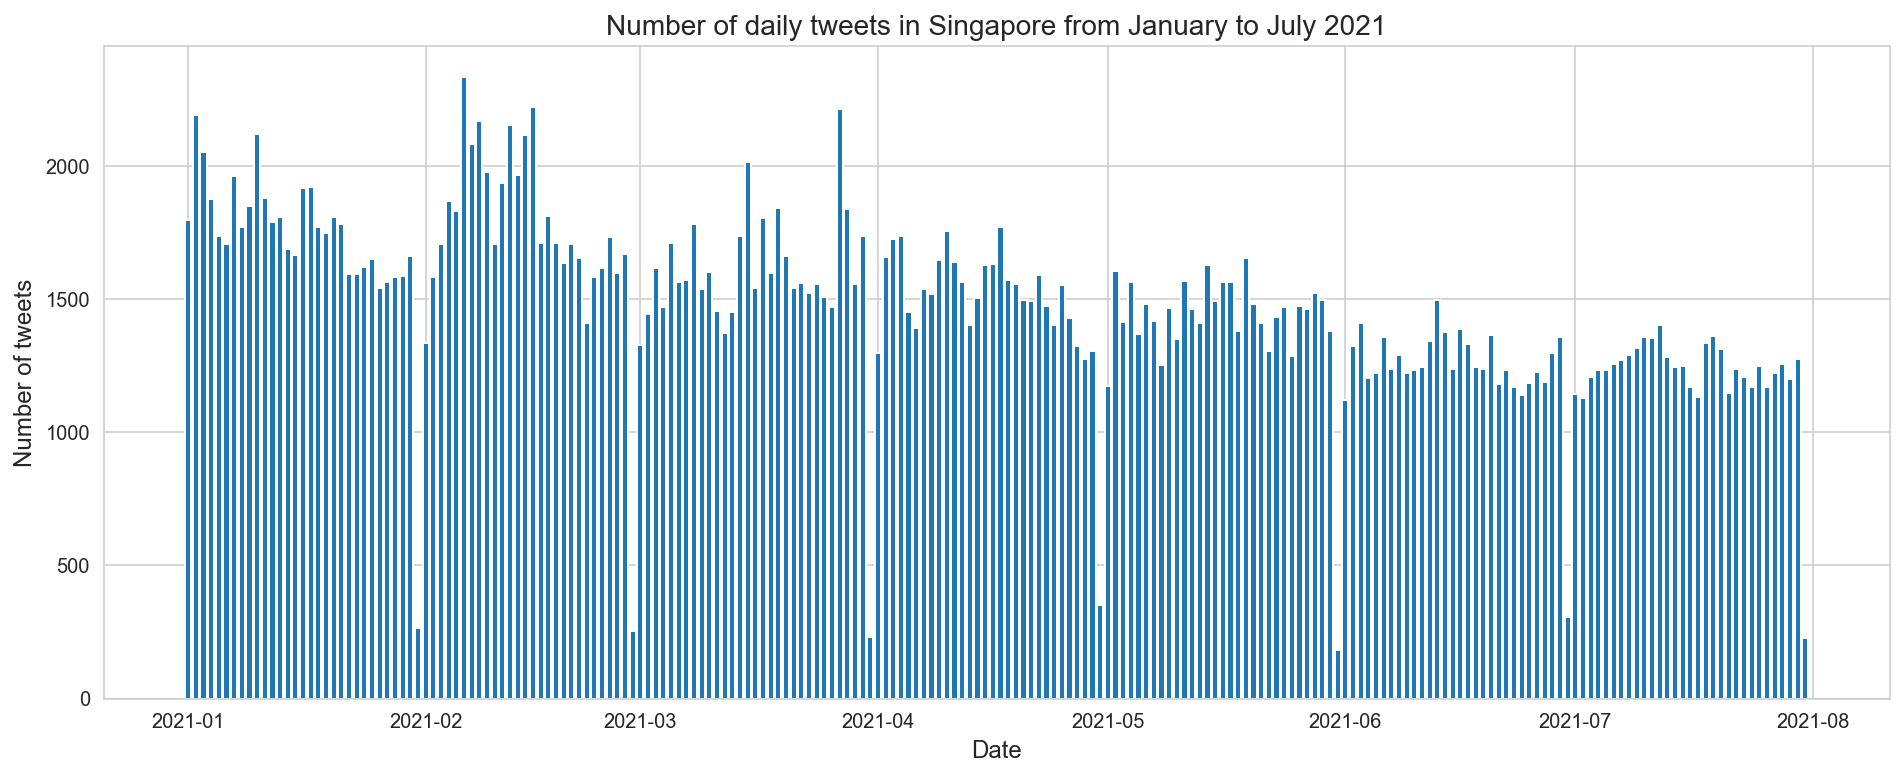

In [20]:
# view the distribution of tweets from Jan to Jul 2021
num_of_tweets = sg_tweets_en_df['date_only'].value_counts().reset_index(name='Date')
num_of_tweets.columns = ['Date', 'Count']
plt.figure(figsize=(16,6))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title('Number of daily tweets in Singapore from January to July 2021', fontsize=14)
plt.bar(num_of_tweets['Date'], num_of_tweets['Count'])

It can be observed that there is a declining trend in the number of tweets in Singapore, from above an average of 1,500 tweets/day in January and February 2021, to falling below the average in July 2021. It is worthwhile to note that there are occasional spikes in the number of tweets/day in February and March 2021 – potentially this may be linked to certain public announcements and/or special occasions in Singapore. 

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul')]

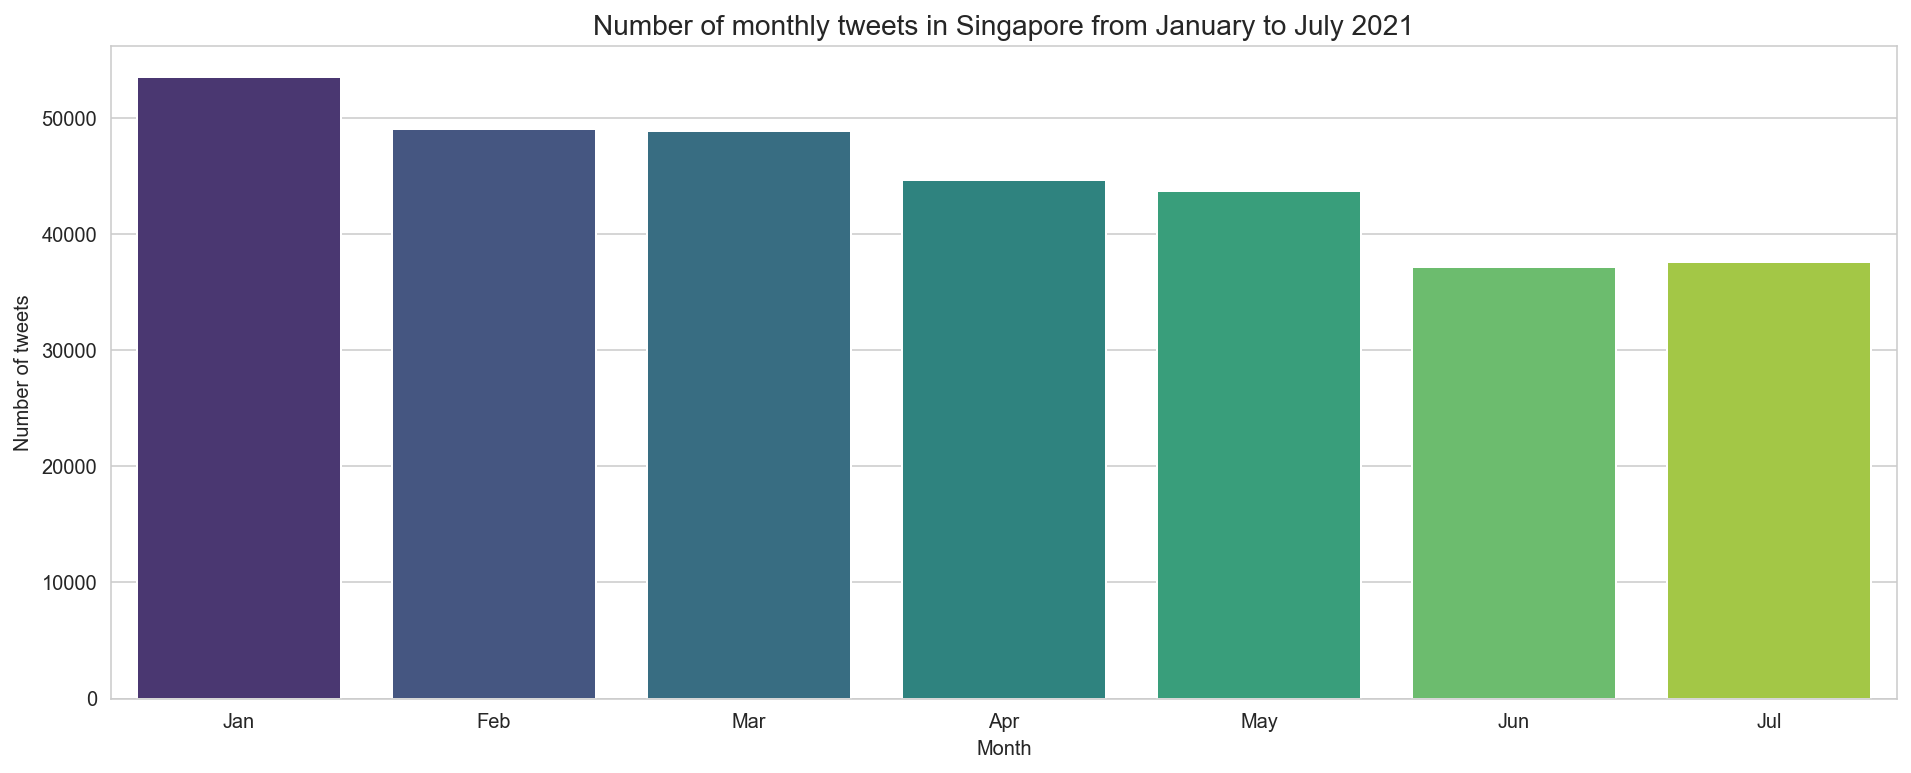

In [21]:
# view the distribution of tweets over months
plt.figure(figsize=(16,6))
plt.title('Number of monthly tweets in Singapore from January to July 2021', fontsize=14)
ax = sns.countplot(x='month', data=sg_tweets_en_df, palette='viridis')
ax.set(xlabel='Month', ylabel='Number of tweets')  
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']
ax.set_xticklabels(months)

Similarly, it can be observed that there is a declining trend in the number of tweets in Singapore, from above an average of 50,000 tweets/month in January 2021, to falling below 40,000 tweets/month in July 2021.

[Text(0.5, 0, 'Hour of day'), Text(0, 0.5, 'Number of tweets')]

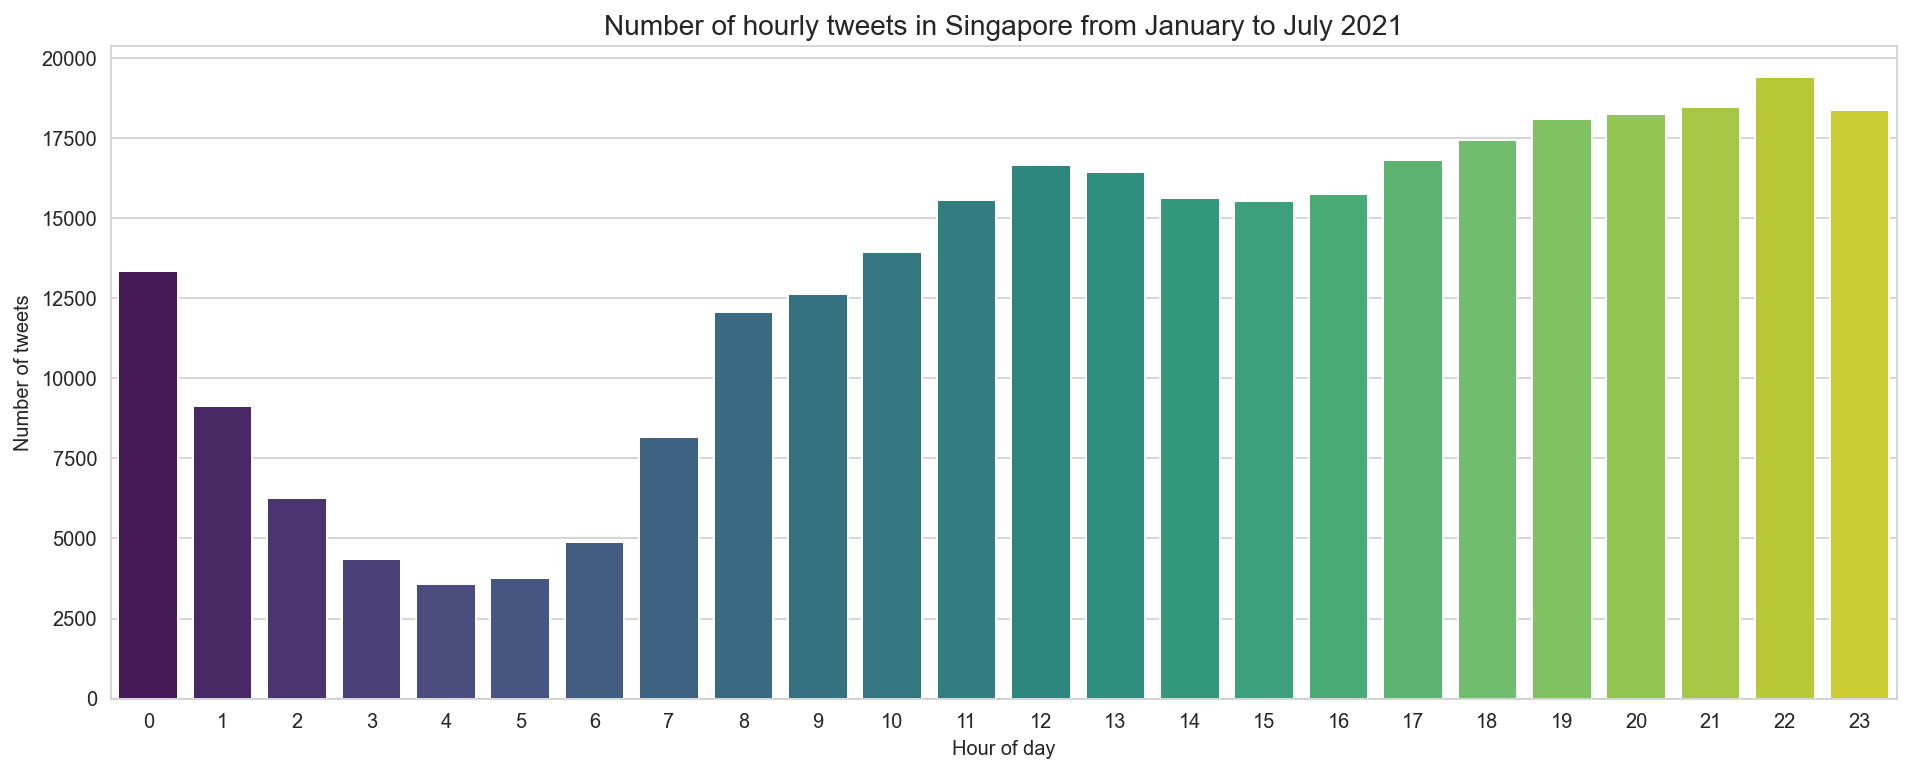

In [22]:
# view the distribution of tweets over hours
plt.figure(figsize=(16,6))
plt.title('Number of hourly tweets in Singapore from January to July 2021', fontsize=14)
ax = sns.countplot(x='hour', data=sg_tweets_en_df, palette='viridis')
ax.set(xlabel = 'Hour of day', ylabel = 'Number of tweets')

It is interesting to note that Twitter user activity in Singapore starts picking up from 8am onwards (most people will be commuting to work in Singapore) and eventually peaks at around 10pm (most people will have ended work for the day, and are browsing the social media site before bed). Twitter user activity gradually subsides in the wee hours of the morning (after 12am).

### 3.2 Visualizing the number of active users over time with `user_id` and `username`

An active user is defined as a Twitter user who has made at least one tweet posting during the time that he/she is online on Twitter.

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul')]

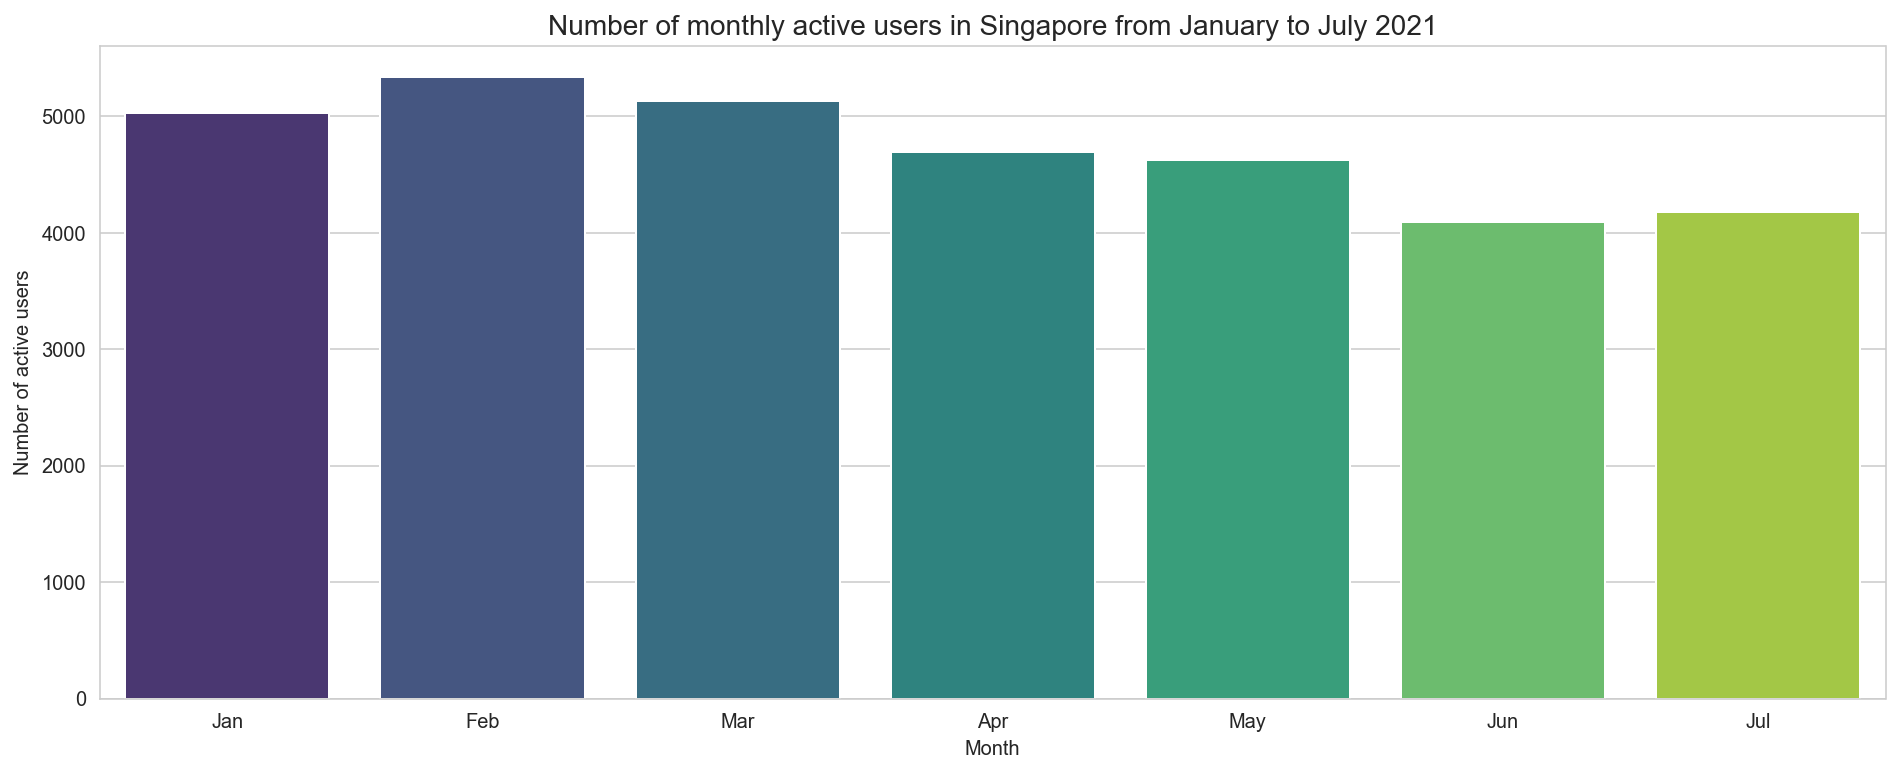

In [23]:
# view the distribution of active users from Jan to Jul 2021
num_monthly_users = sg_tweets_en_df.groupby('month')['user_id'].nunique().to_frame()
plt.figure(figsize=(16,6))
plt.title('Number of monthly active users in Singapore from January to July 2021', fontsize=14)
ax = sns.barplot(x=num_monthly_users.index, y='user_id', data=num_monthly_users, palette='viridis')
ax.set(xlabel='Month', ylabel='Number of active users')  
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']
ax.set_xticklabels(months)

The number of active users on Twitter posting tweets in Singapore has increased in January and February 2021 (above 5,000 in February), before declining and hitting slightly above 4,000 users in July 2021. This trend seems to mimic the movement in the number of tweets on a monthly basis.

[Text(0.5, 0, 'Hour of day'), Text(0, 0.5, 'Number of active users')]

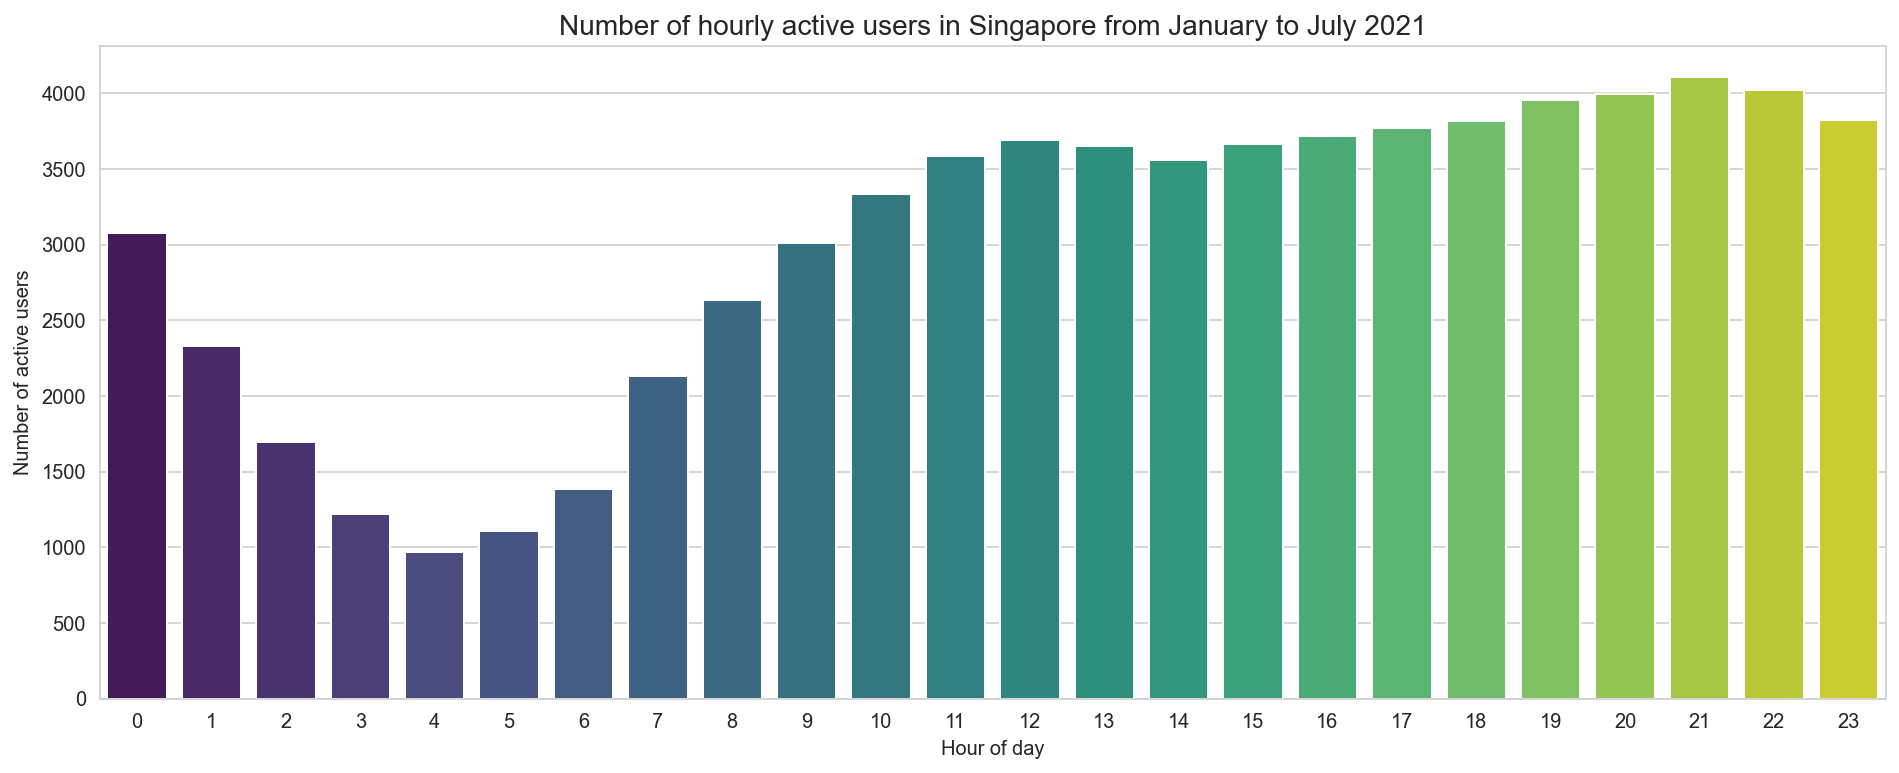

In [24]:
# view the distribution of active users over hours
num_hourly_users = sg_tweets_en_df.groupby('hour')['user_id'].nunique().to_frame()
plt.figure(figsize=(16,6))
plt.title('Number of hourly active users in Singapore from January to July 2021', fontsize=14)
ax = sns.barplot(x=num_hourly_users.index, y='user_id', data=num_hourly_users, palette='viridis')
ax.set(xlabel='Hour of day', ylabel='Number of active users')

Similarly, the number of active users in Singapore starts picking up from 7am onwards and eventually peaks at around 9pm, before subsiding in the wee hours of the morning (after 12am).

[Text(0.5, 0, 'Username'), Text(0, 0.5, 'Number of tweets')]

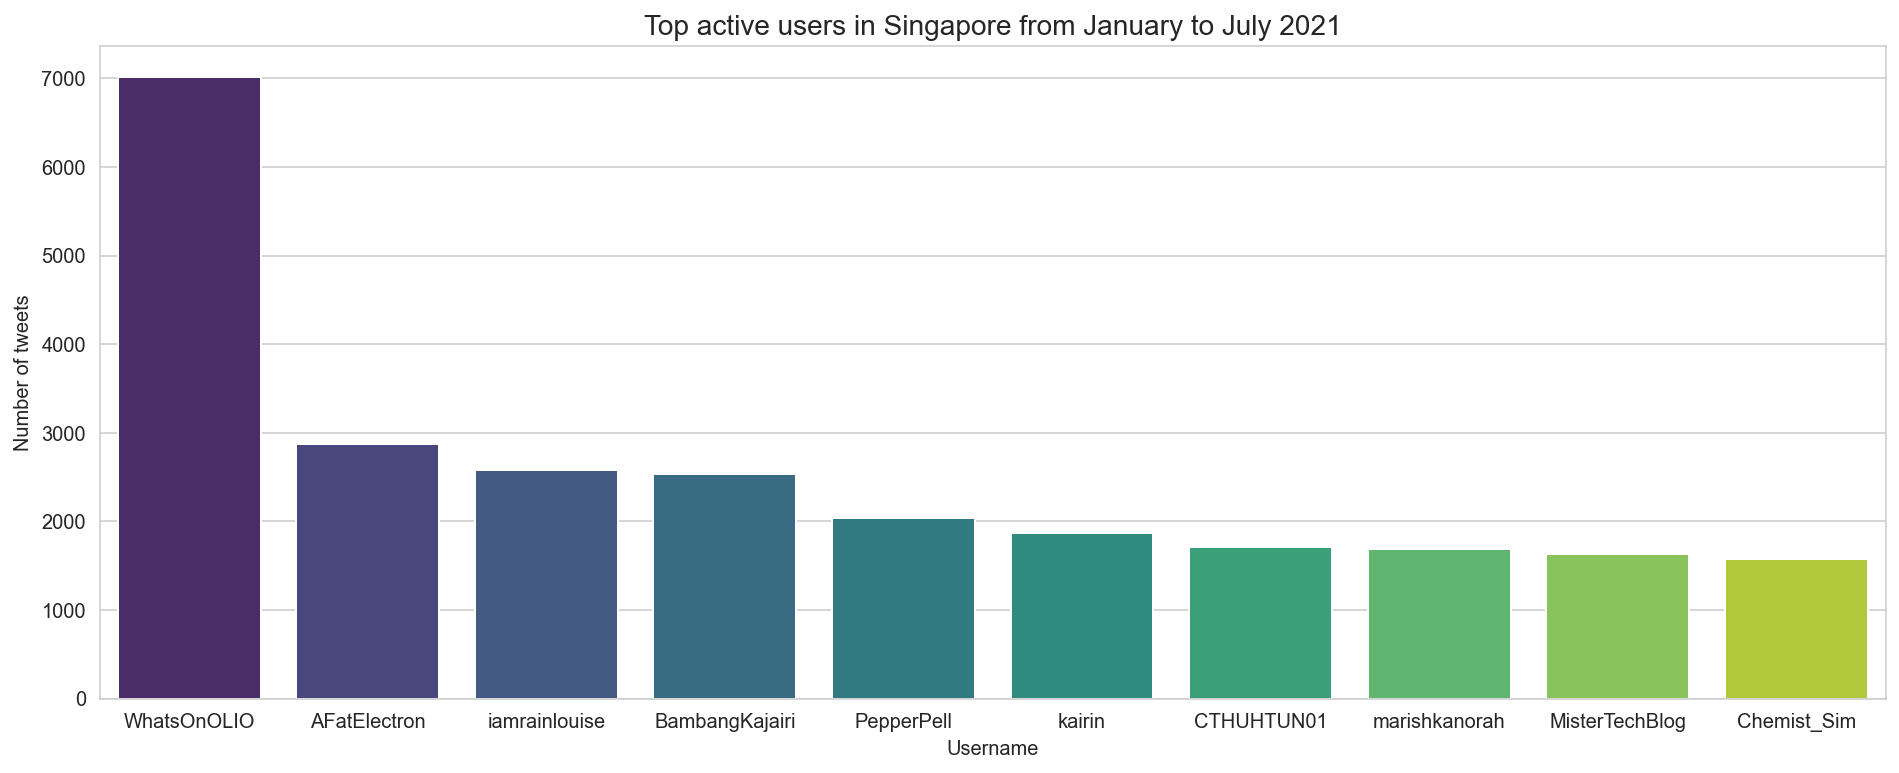

In [25]:
# identify the top users with the highest number of tweets
top_users = sg_tweets_en_df['username'].value_counts().reset_index(name='count').head(10)
plt.figure(figsize=(16,6))
plt.title('Top active users in Singapore from January to July 2021', fontsize=14)
ax = sns.barplot(x='index', y='count', data=top_users, palette='viridis')
ax.set(xlabel='Username', ylabel='Number of tweets')

It is interesting to note that one particular Twitter user – WhatsOnOLIO – has posted around 7,000 tweets over the past seven months in 2021 – that's akin to 1,000 tweets per month. On the other hand, the remaining Twitter users have posted less than 3,000 tweets in the same period of time. 

Upon looking into the profile of WhatsOnOLIO on Twitter, it can be observed that WhatsOnOLIO is a Twitter channel for the mobile application OLIO, informing users about food and household items that have been put up for sharing, in a bid to reduce wastage. Therefore, it is likely that the number of tweets posted by WhatsOnOLIO is significantly higher than the day-to-day average Twitter user. 

<img src='../images/olio_twitter.JPG' width=400 align=left> <img src='../images/olio_website.JPG' width=500 align=right>

### 3.3 Visualizing the distribution for `nlikes`, `nreplies` and `nretweets`

I'm keen to understand if any pattern exists for the number of likes, replies and retweets that tweets generally receive.

In [26]:
# create a function to plot histogram and boxplot respectively

def plot_charts(column_name, color_choice, xlabel_name, title_name):
    
    # view the numerical description
    print(sg_tweets_en_df[column_name].describe())
    
    # set the size of the charts
    fig,ax = plt.subplots(1,2, figsize=(16,6))
    
    # create a histogram
    sns.distplot(sg_tweets_en_df[column_name], ax=ax[0], color=color_choice)
    ax[0].set_xlabel(xlabel_name, fontsize=12)
    ax[0].set_title(title_name, fontsize=14)
    
    # create a boxplot
    sns.boxplot(sg_tweets_en_df[column_name], ax=ax[1], color=color_choice)
    ax[1].set_xlabel(xlabel_name, fontsize=12)
    ax[1].set_title(title_name, fontsize=14)
    
    plt.tight_layout();

#### 3.3.1 Viewing the distribution for `nlikes`

count    314576.000000
mean          3.794886
std          92.318485
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       20864.000000
Name: nlikes, dtype: float64


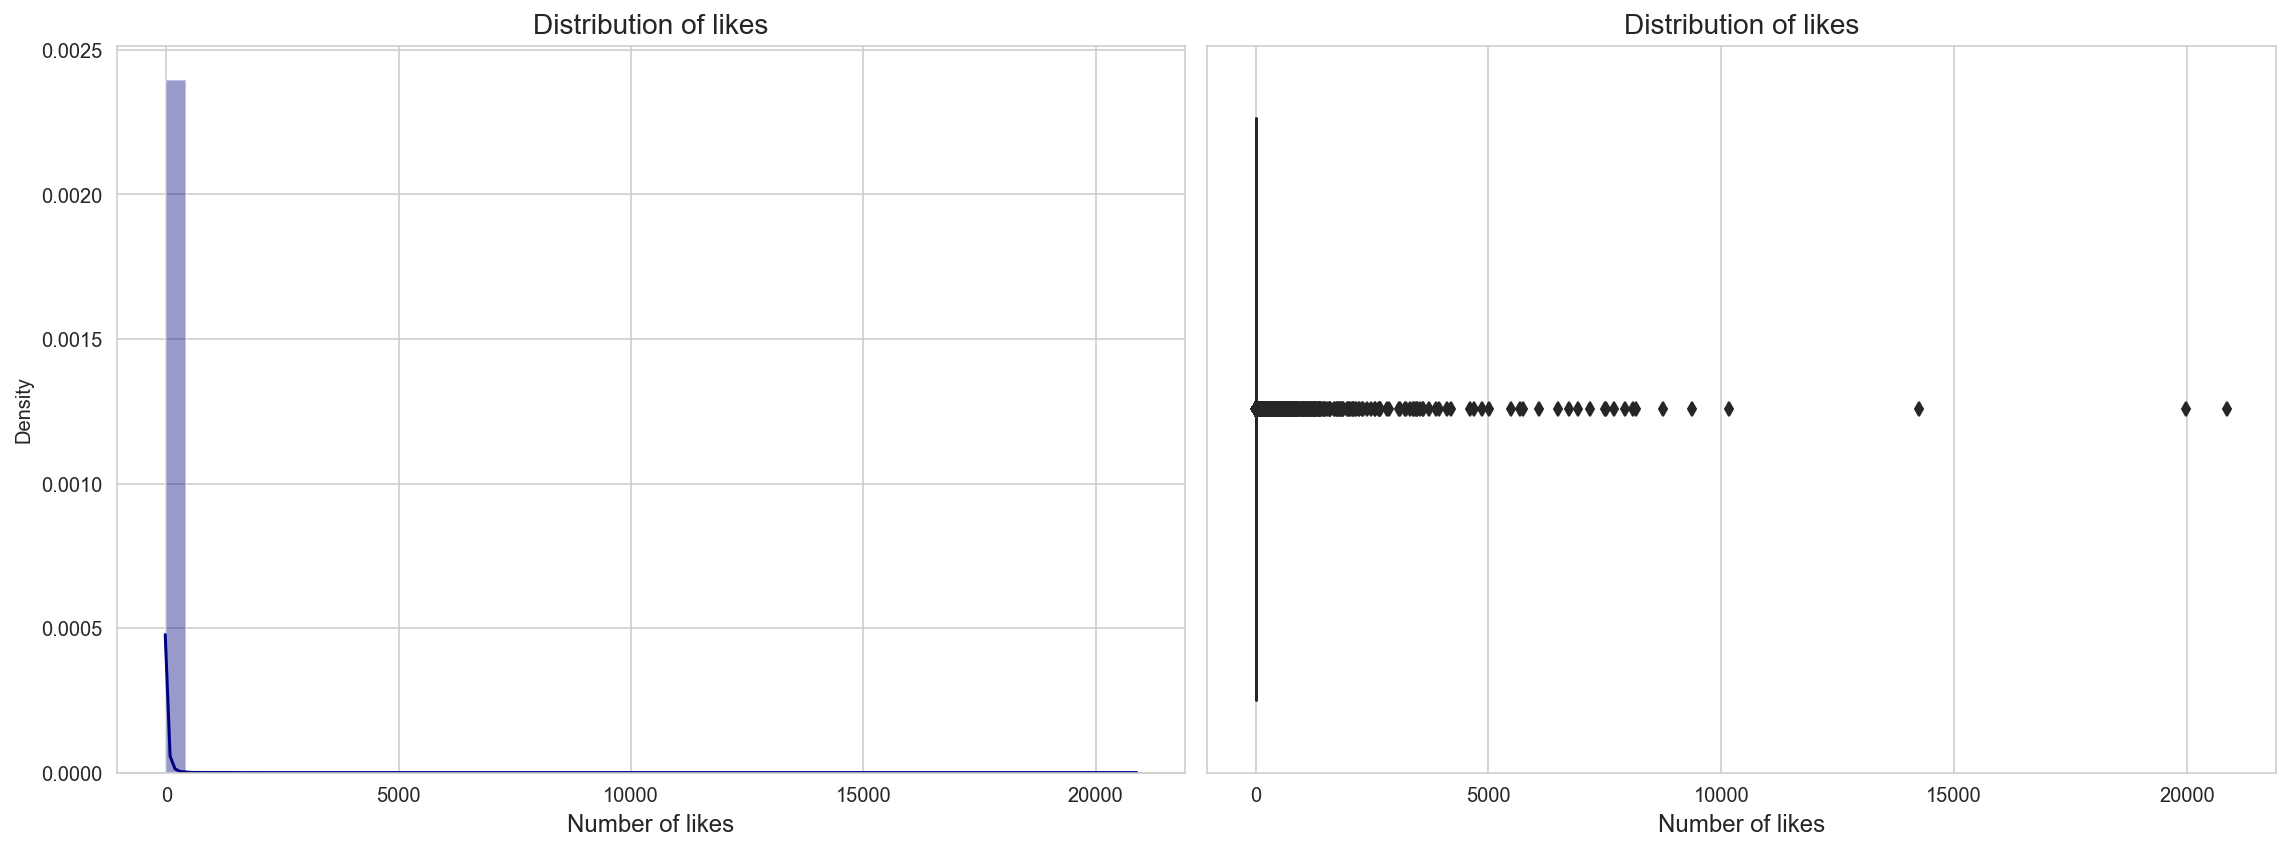

In [27]:
# view the distribution for nlikes
plot_charts('nlikes', 'navy', 'Number of likes', 'Distribution of likes')

Most tweets will receive a mean number of three to four likes. However, outliers with tweets receiving up to 20,864 likes are observed, which spurs me to look into the source of this 'viral' tweet. 

In [28]:
# view the tweet that has received the most number of likes
sg_tweets_en_df[sg_tweets_en_df['nlikes']==20864]

,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near,date_only,month,year,hour,char_length,word_count,num_hashtag,num_mentions
326717,1384031430586421248,2021-04-19 14:29:41,"I saw this Facebook, I was impressed. Finally...",en,[],3283030512,GhazaleeIbr,20864,46,9398,Singapore,2021-04-19,4,2021,14,273,48,0,0


Tracing this tweet on Twitter, it belongs to Twitter user Ghazalee Ibrahim, the owner of GUS Pizzeria, recommending a cooking tutorial by another Twitter user. It is likely that cooking tutorials have become a hit among users, where they are spending more time at home during the pandemic. 

<img src='../images/highest_like_tweet.JPG' width=500 align=center>

#### 3.3.2 Viewing the distribution for `nreplies`

count    314576.000000
mean          0.362307
std           4.270884
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1328.000000
Name: nreplies, dtype: float64


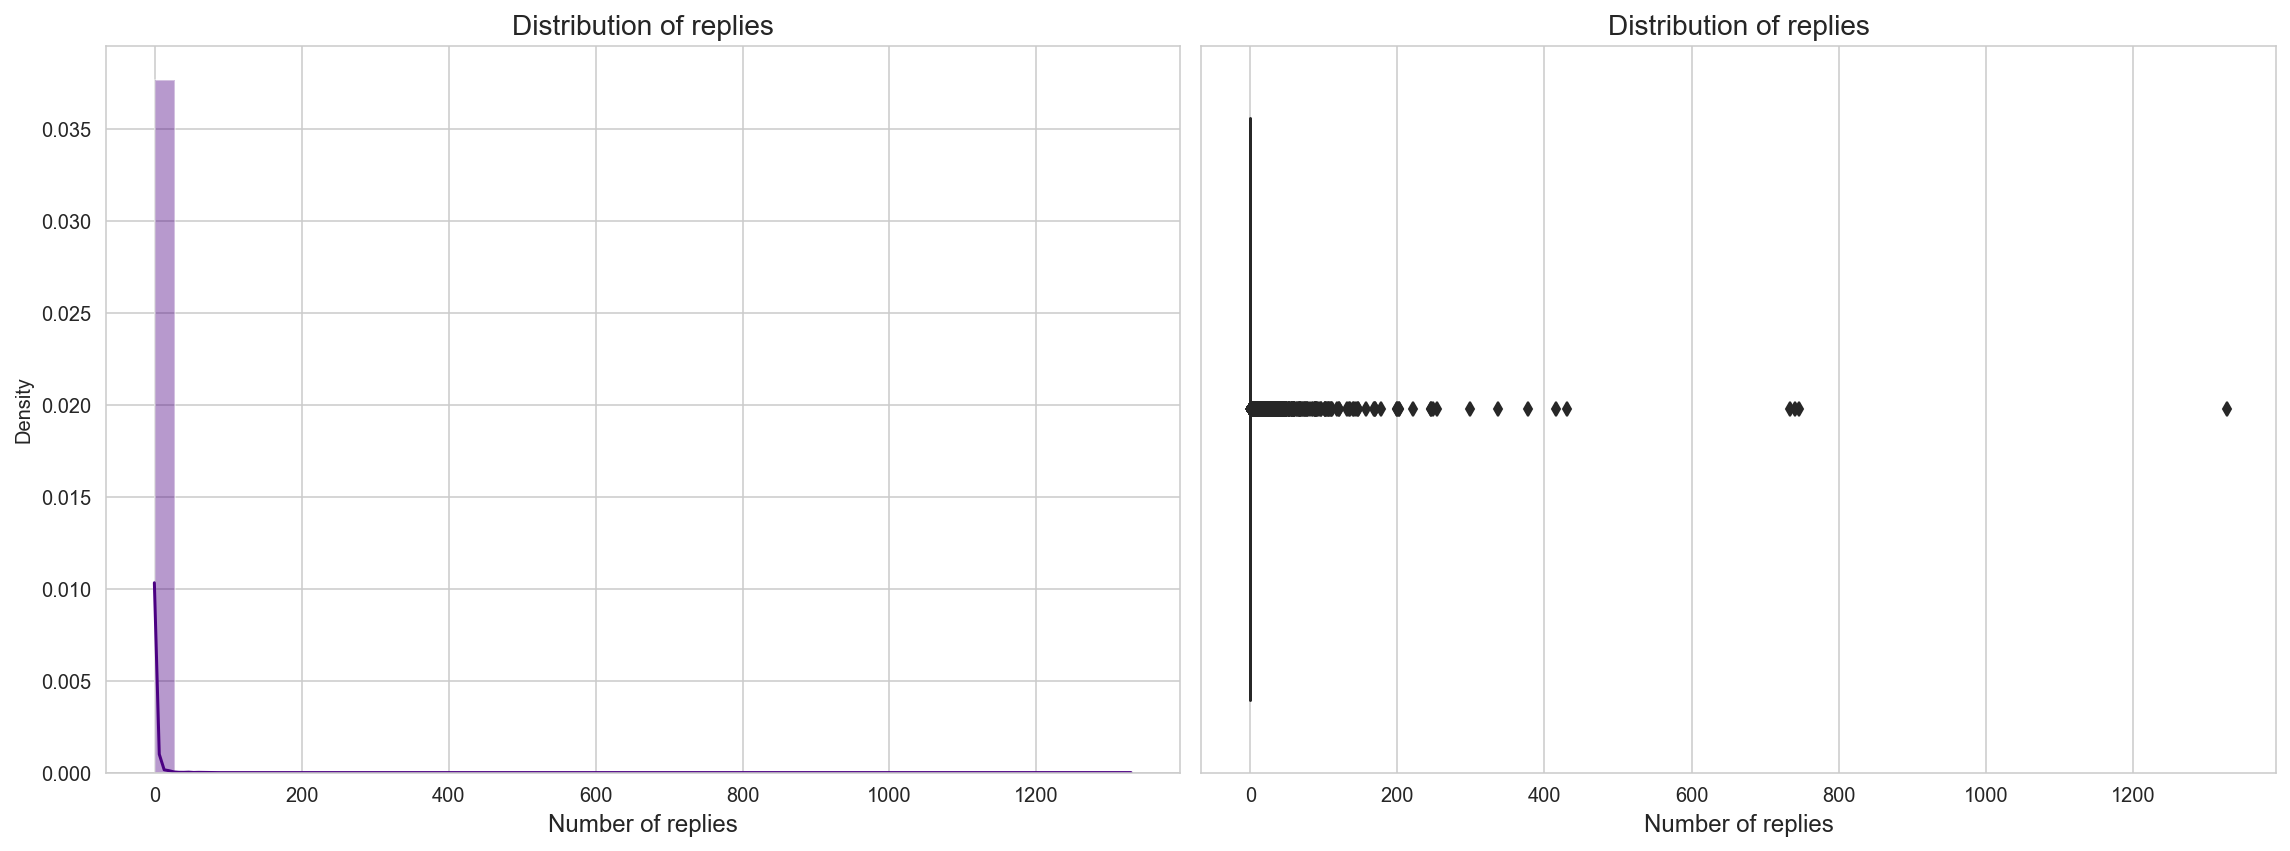

In [29]:
# view the distribution for nreplies
plot_charts('nreplies', 'indigo', 'Number of replies', 'Distribution of replies')

Similar to the number of likes, most tweets receive up to one reply. Outliers are observed as well, with tweets receiving up to 1,200 replies.

In [30]:
# view the tweet that has received the most number of replies
sg_tweets_en_df[sg_tweets_en_df['nreplies']==1328]

,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near,date_only,month,year,hour,char_length,word_count,num_hashtag,num_mentions
553693,1420590504400494592,2021-07-29 11:42:24,July Goal: 30 scholars ✅ August Goal: 60 scho...,en,"['axieinfinityscholarship', 'gaming', 'nftcomm...",1111343775035596801,thebuffessor,2567,1328,1248,Singapore,2021-07-29,7,2021,11,120,16,3,0


Tracing this tweet on Twitter, it belongs to Twitter user The Buffessor, who is a professional gamer. His tweet surrounds the topic of Axie Infinity Scholarship, which aims to help aspiring Axie Infinity players build a starter team in the game. 

<img src='../images/highest_reply_tweet.JPG' width=600 align=center>

#### 3.3.3 Viewing the distribution for `nretweets`

count    314576.000000
mean          1.203477
std          41.683416
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        9398.000000
Name: nretweets, dtype: float64


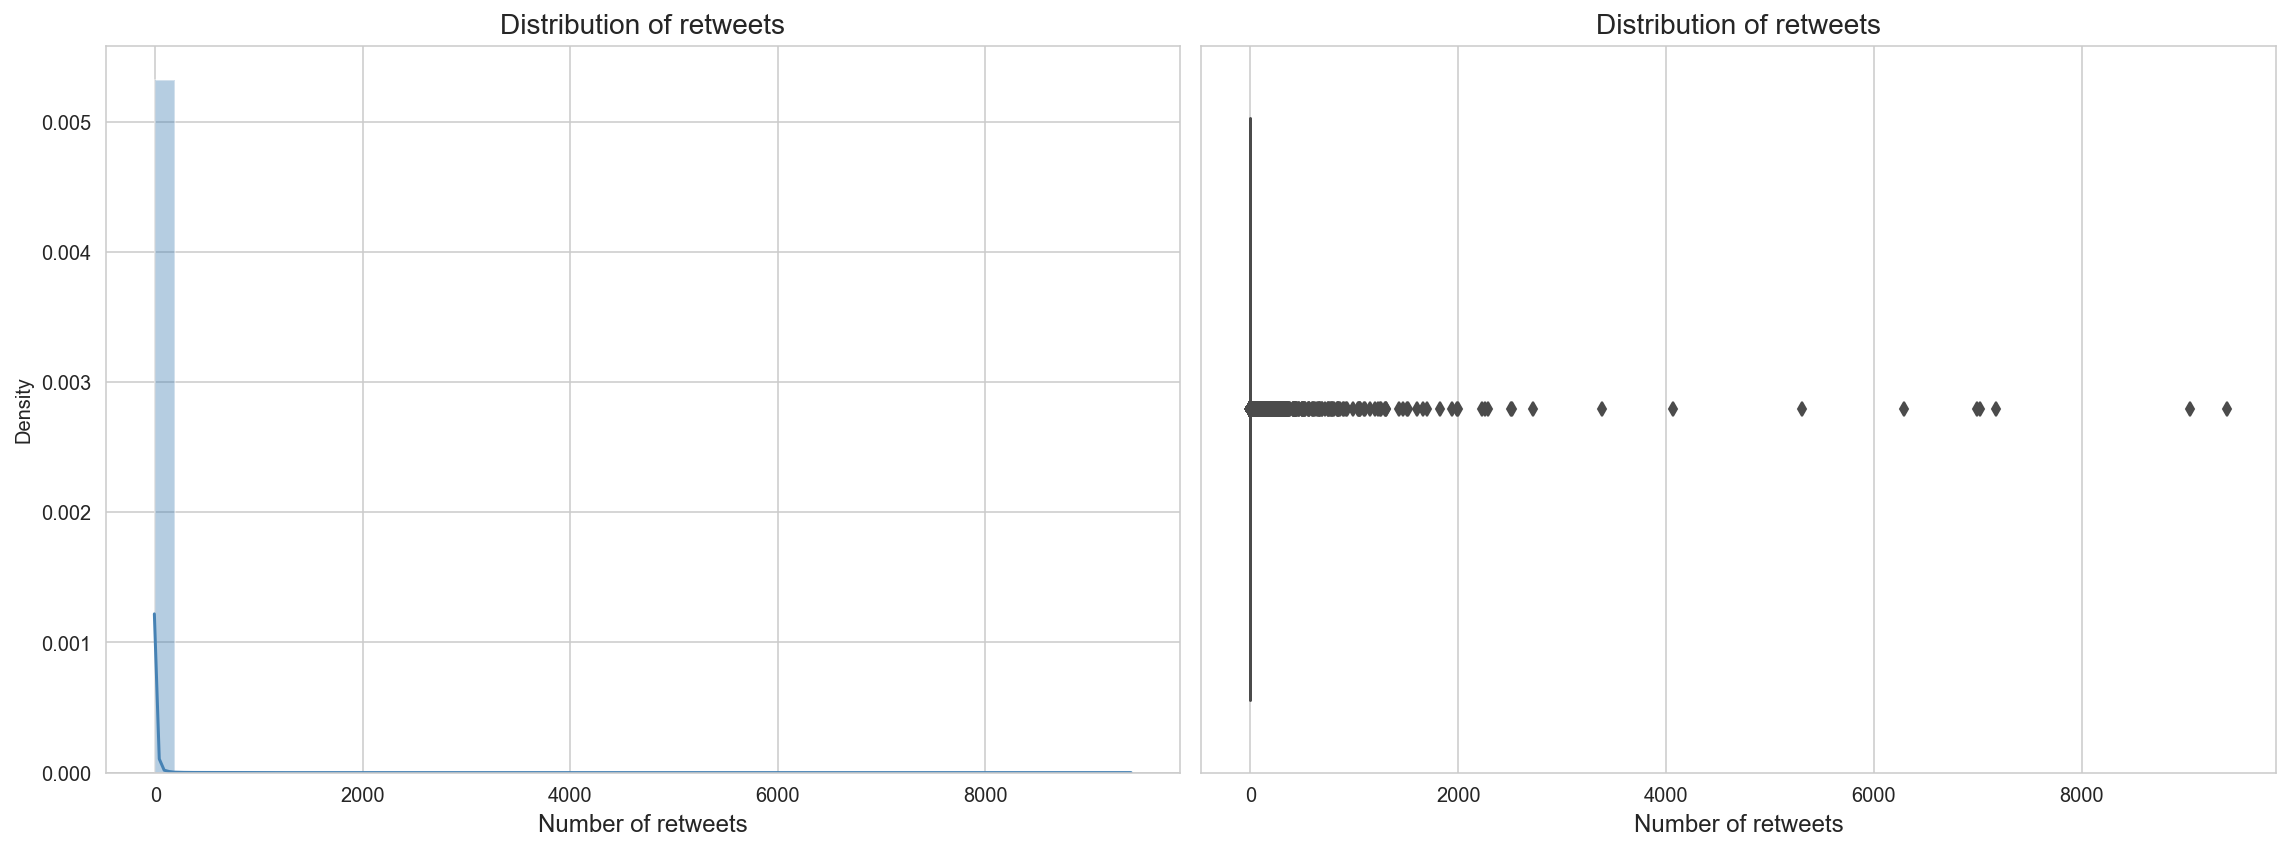

In [31]:
# view the distribution for nretweets
plot_charts('nretweets', 'steelblue', 'Number of retweets', 'Distribution of retweets')

Similar to the number of likes and replies, most tweets receive an average of 1.2 retweets. Several outliers exist, with tweets receiving up to 9,398 retweets.

In [32]:
# view the tweet that has received the most number of retweets
sg_tweets_en_df[sg_tweets_en_df['nretweets']==9398]

,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near,date_only,month,year,hour,char_length,word_count,num_hashtag,num_mentions
326717,1384031430586421248,2021-04-19 14:29:41,"I saw this Facebook, I was impressed. Finally...",en,[],3283030512,GhazaleeIbr,20864,46,9398,Singapore,2021-04-19,4,2021,14,273,48,0,0


This tweet belongs to Twitter user Ghazalee Ibrahim – whom has not only scored the highest number of likes but also the highest number of retweets during the same time period. 

### 3.4 Visualizing the distribution for `num_mentions` and `num_hashtag`

I'm keen to find out the number of mentions and hashtags that is usually included in each tweet. 

#### 3.4.1 Viewing the distribution for `num_mentions`

count    314576.00000
mean          0.56208
std           1.21883
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max          50.00000
Name: num_mentions, dtype: float64


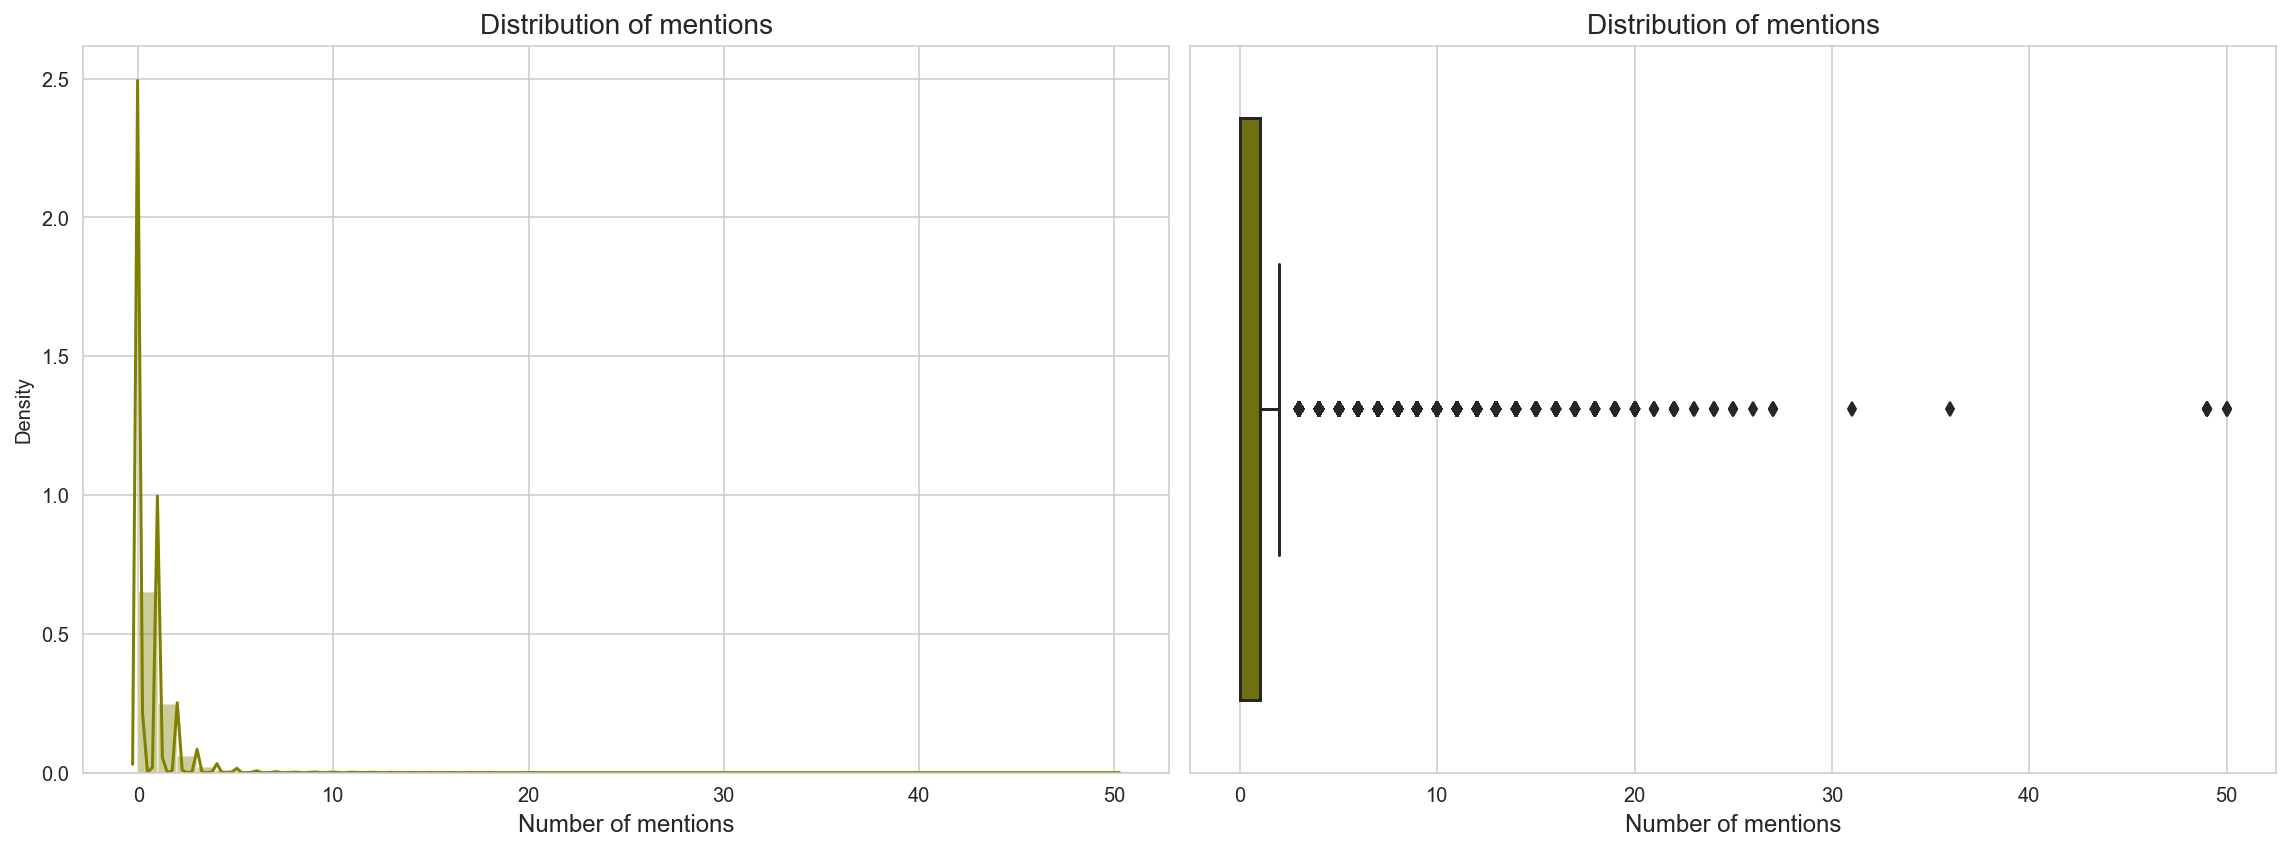

In [33]:
# view the distribution for num_mentions
plot_charts('num_mentions', 'olive', 'Number of mentions', 'Distribution of mentions')

Each tweet generally contains one mention of another Twitter user, though the highest number of mentions in a single tweet is as high as 50. 

In [34]:
# view the tweet that has included the highest number of mentions
sg_tweets_en_df[sg_tweets_en_df['num_mentions']==50]

,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near,date_only,month,year,hour,char_length,word_count,num_hashtag,num_mentions
221102,1374945726191390733,2021-03-25 12:46:21,@imkimaaron @BoiseLazarus @DeanPHanley @RealRa...,en,[],628688453,NotLordByron,1,0,0,Singapore,2021-03-25,3,2021,12,725,58,0,50
296562,1387714722569494533,2021-04-29 18:25:47,@carol_jauregui @carlesmarsal @4kMiky @_DKDNZ_...,en,"['nftcommunity', 'nftcollectors', 'nftdrop']",1372613128832307201,thewanone,5,0,0,Singapore,2021-04-29,4,2021,18,789,66,3,50
465733,1389267300675514369,2021-05-04 01:15:10,@popilart @stevendailyart @r0bp @natebear @Ter...,en,[],1372613128832307201,thewanone,5,1,0,Singapore,2021-05-04,5,2021,1,685,58,0,50


Tracing these tweets on Twitter, it can be observed that when a user replies to a post (or rather conversation), it captures all Twitter users who have replied to the same initial Twitter post. This is the functionality on Twitter – it is not the case whereby the writer has included all 50 users in his/her post. 

Therefore, all user mentions need to be removed from the original tweet contents subsequently.

<img src='../images/most_mentions_tweet1.JPG' width=450 align=left> 
<img src='../images/most_mentions_tweet2.JPG' width=400 align=right>
<img src='../images/most_mentions_tweet3.JPG' width=450 align=left>

#### 3.4.2 Viewing the distribution for `num_hashtags`

count    314576.000000
mean          0.592652
std           1.513145
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: num_hashtag, dtype: float64


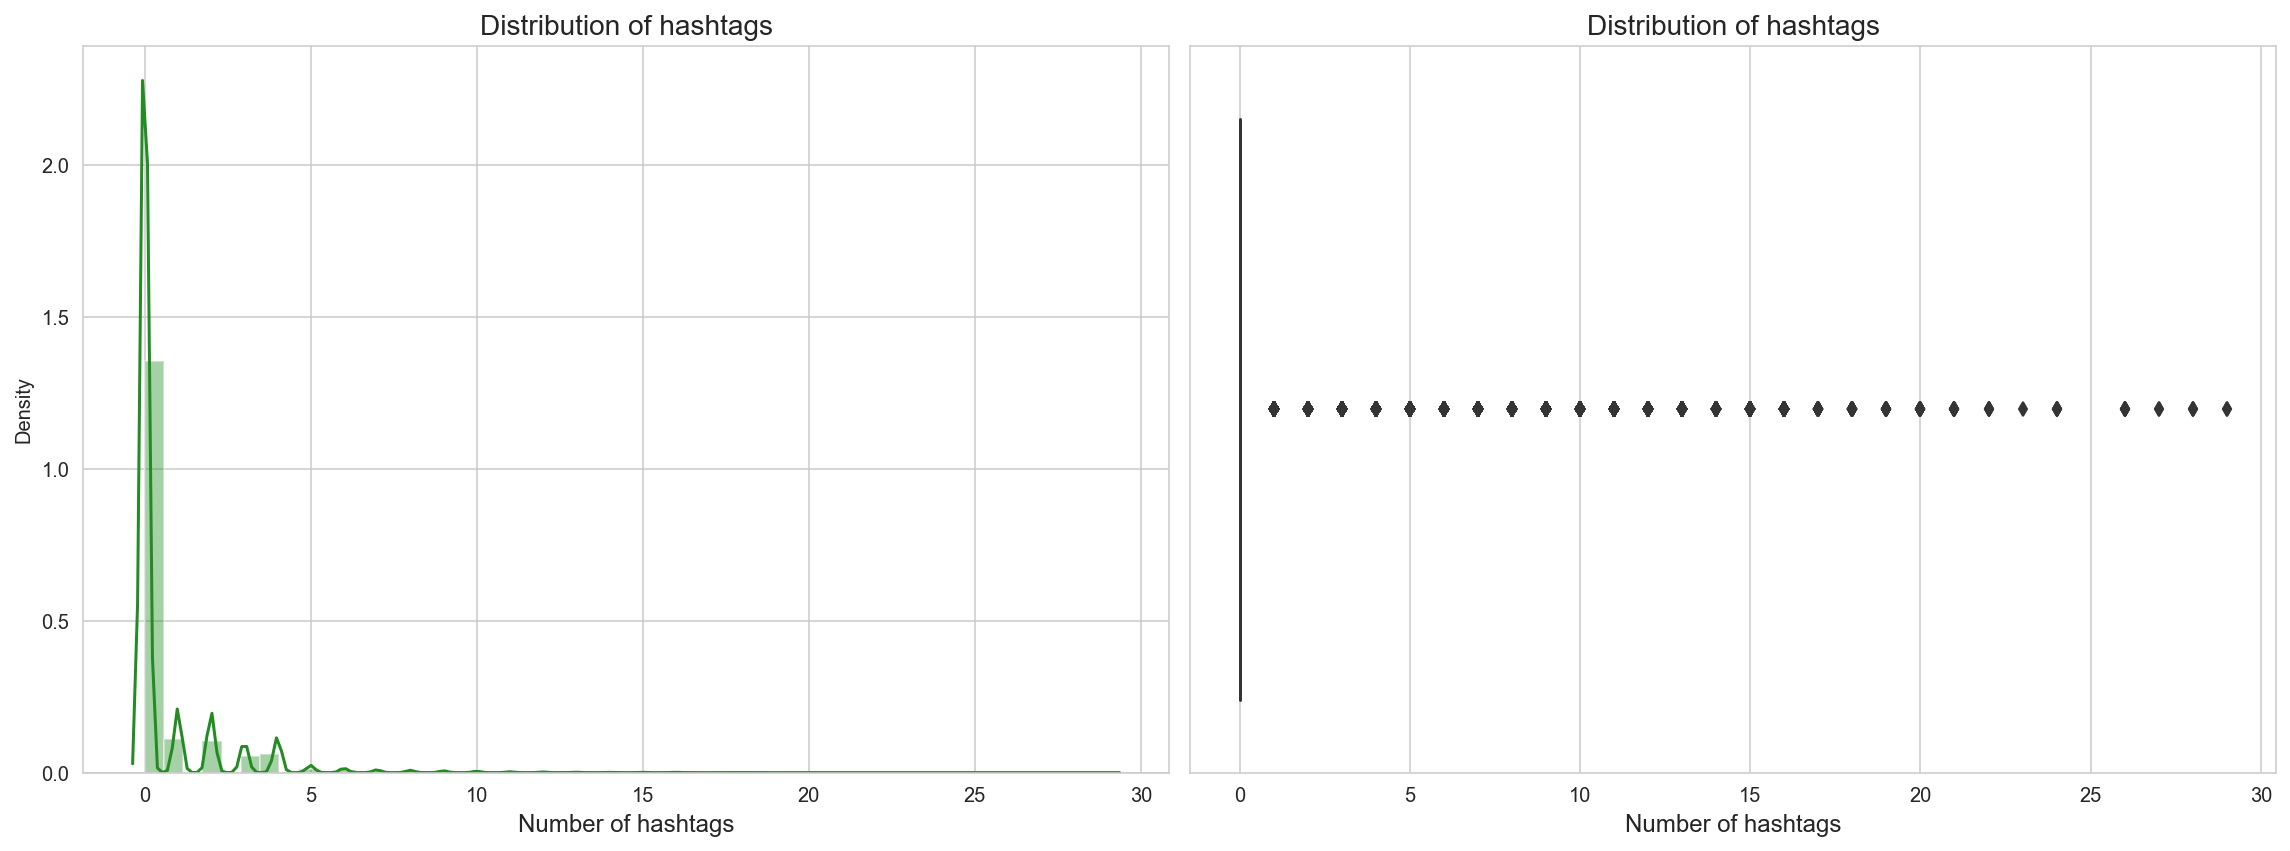

In [35]:
# view the distribution for num_hashtags
plot_charts('num_hashtag', 'forestgreen', 'Number of hashtags', 'Distribution of hashtags')

One tweet generally contains one hashtag, though the highest number of hashtags included in tweets can go up to 29.

In [36]:
# view the tweet that has included the highest number of hashtags
sg_tweets_en_df[sg_tweets_en_df['num_hashtag']==29]

,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near,date_only,month,year,hour,char_length,word_count,num_hashtag,num_mentions
399,1355563431697534976,2021-01-31 01:08:01,YEAH! #stretching #mindset #body #spirit #mind...,en,"['stretching', 'mindset', 'body', 'spirit', 'm...",97647943,ZephyrKhambatta,1,0,1,Singapore,2021-01-31,1,2021,1,279,30,29,0
116208,1364505292373860355,2021-02-24 17:19:47,Comeback Show for #SUPERJUNIOR on 16 March 202...,en,"['superjunior', '슈퍼주니어', '이특', '利特', 'leeteuk'...",948932738299584512,yeteukwook,7,0,0,Singapore,2021-02-24,2,2021,17,211,37,29,0


Tracing both tweets on Twitter, it can be seen that:  
- The first tweet *(displayed on the left in the image below)* is by Twitter user Zephyr Khambatta, whose content surrounds fitness, health training and mindfulness.
- The second tweet *(displayed on the right in the image below)* is by Twitter user YeTeukWook, which is a fan channel for KPOP (Korean Pop) boyband Super Junior, about the performance from the boyband.

<img src='../images/most_hashtag_tweet1.JPG' width=450 align=left> <img src='../images/most_hashtag_tweet2.JPG' width=500 align=right>

I'm intrigued to examine the `hashtags` column further, as it may contain topics trending in Singapore at any point in time.

#### 3.4.3 Examining the `hashtags` column present

In [37]:
# convert the hashtags from an object to a list
sg_tweets_en_df['hashtags'] = sg_tweets_en_df['hashtags'].apply(eval)

In [38]:
# create a function to reduce the dimensions of the hashtags column from 2 to 1
def convert_to_one_dimensional(series):
    return pd.Series([x for _list in series for x in _list])

In [39]:
# view the percentage of time that each hashtag word appears
count_of_hashtags = convert_to_one_dimensional(sg_tweets_en_df['hashtags'])

print('Percentage (%) of counts that the particular hashtag word appears:')
print(count_of_hashtags.value_counts() / len(sg_tweets_en_df) * 100)

Percentage (%) of counts that the particular hashtag word appears:
singapore                       5.142160
whatshappeninginmyanmar         4.455521
free                            2.222992
zerowaste                       1.965821
edwardbarber                    0.728600
                                  ...   
justiceforsushantsinghrajput    0.000318
miaasysyuraanwar                0.000318
christianeriksen                0.000318
brixton                         0.000318
makingpuffpastry                0.000318
Length: 33322, dtype: float64


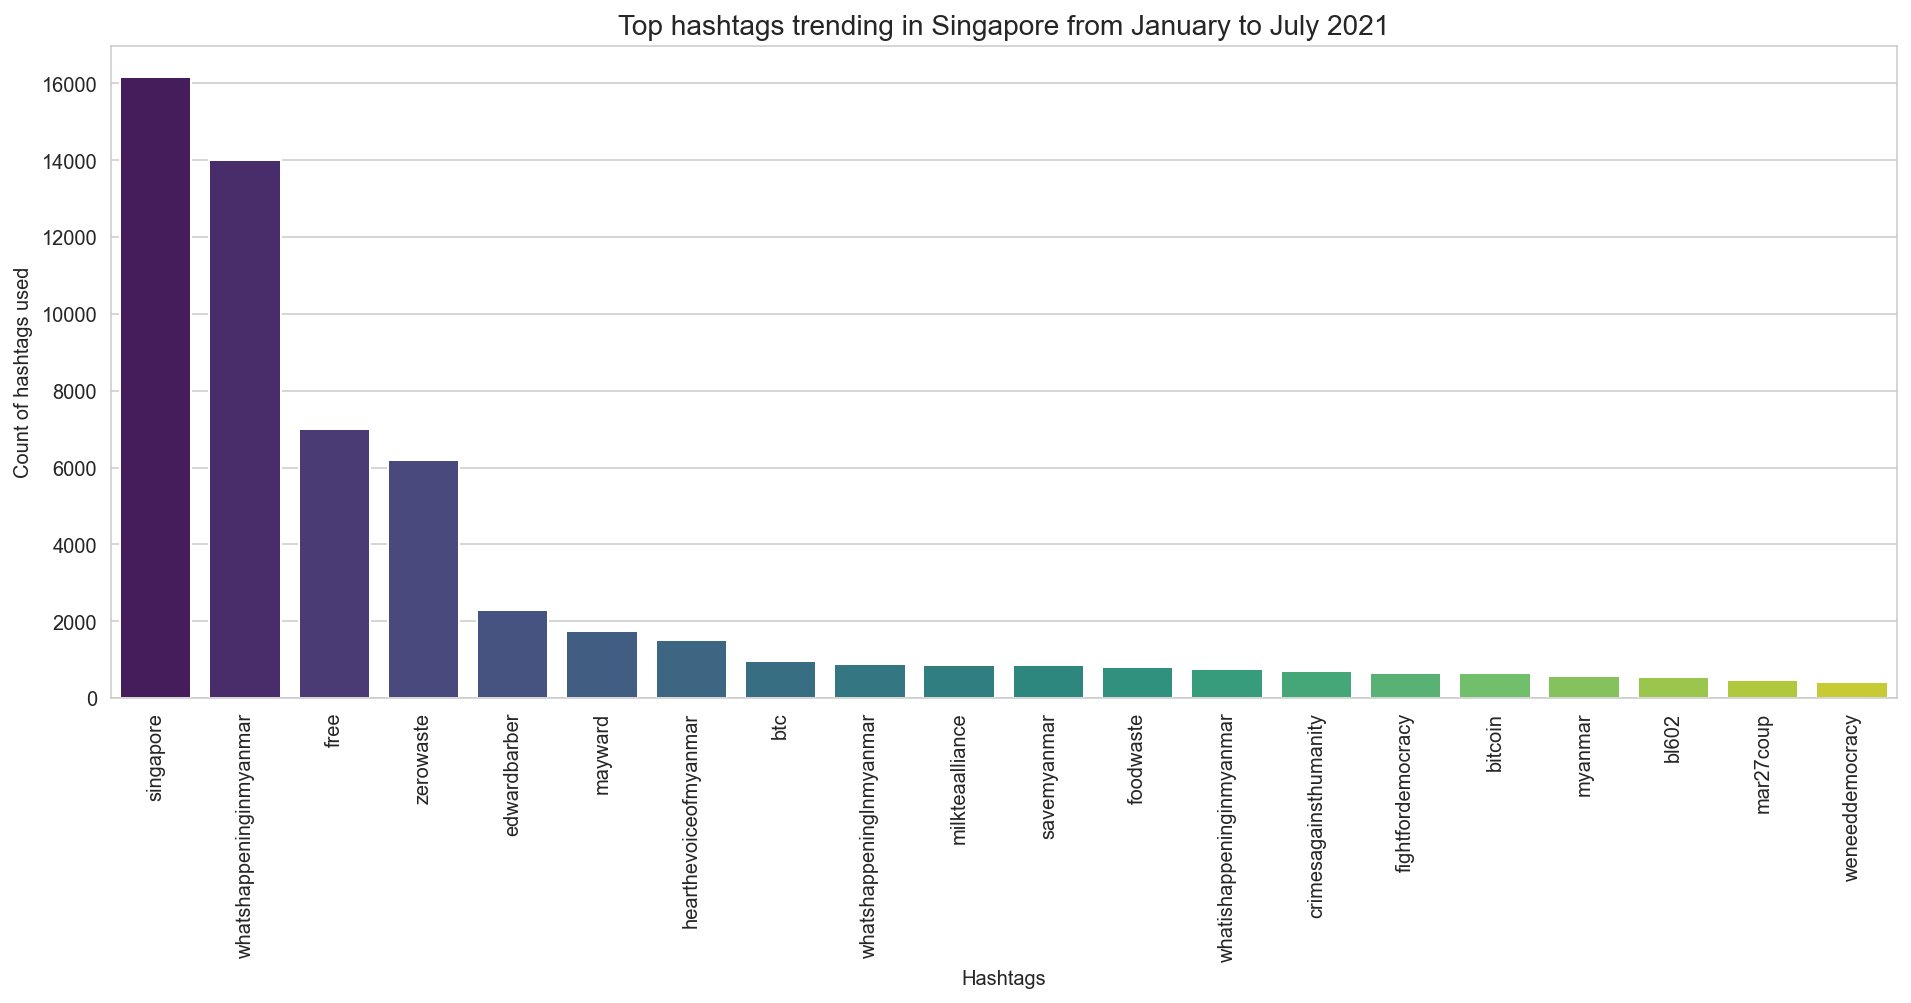

In [40]:
# view the top hashtags used
plt.figure(figsize=(16,6))
plt.title('Top hashtags trending in Singapore from January to July 2021', fontsize=14)
ax = sns.barplot(x=count_of_hashtags.value_counts().head(20).index, y=count_of_hashtags.value_counts().head(20).values, 
                 palette='viridis')
ax.set(xlabel='Hashtags', ylabel='Count of hashtags used')
ax.tick_params(axis='x', rotation=90)

From the above chart, the top 20 trending hashtags include: 
- **'singapore'** – anything that has happened in Singapore, i.e. topics related to the COVID-19 situation in Singapore, vaccination status, places to explore, etc. 
- **'whatshappeninginmyanmar', 'hearthevoiceofmyanmar', 'savemyanmar', 'whatishappeninginmyanmar', 'crimesagainsthumanity', 'fightfordemocracy', 'myanmar', 'mar27coup', 'weneeddemocracy'** – refers to the military coup in Myanmar that has begun from February 2021, and the series of protests against the coup by the citizens that have followed.
- **'free'** – anything that is free of charge and available for Twitter users to explore. 
- **'zerowaste', 'foodwaste'** – with greater awareness of environmental issues, more users are looking at sustainable ways to reduce the amount of waste (items and foods) that they generate in their day-to-day lives. 
- **'edwardbarber', 'mayward'** – refers to Edward Barber and MayMay Entrata who are top celebrities in The Philippines.
- **'btc', 'bitcoin'** – refers to the trading of Bitcoin.
- **'milkteaalliance'** – refers to an online movement that is initially made up of netizens from Hong Kong, Thailand and Taiwan, to protest against authoritarianism and advocate democracy.
- **'bl602'** – refers to a simulator used in programming scripting. 

### 3.5 Visualizing the distribution for `char_length` and `word_count`

Whilst Twitter has implemented a character limit (with spaces included) of up to 280, I'm keen to understand the number of words in a tweet, and whether the 280 character limit is adhered here to for webscraped tweets.

#### 3.5.1 Viewing the distribution for `char_length`

count    314576.000000
mean         93.044533
std          73.733296
min           4.000000
25%          41.000000
50%          68.000000
75%         119.000000
max         789.000000
Name: char_length, dtype: float64


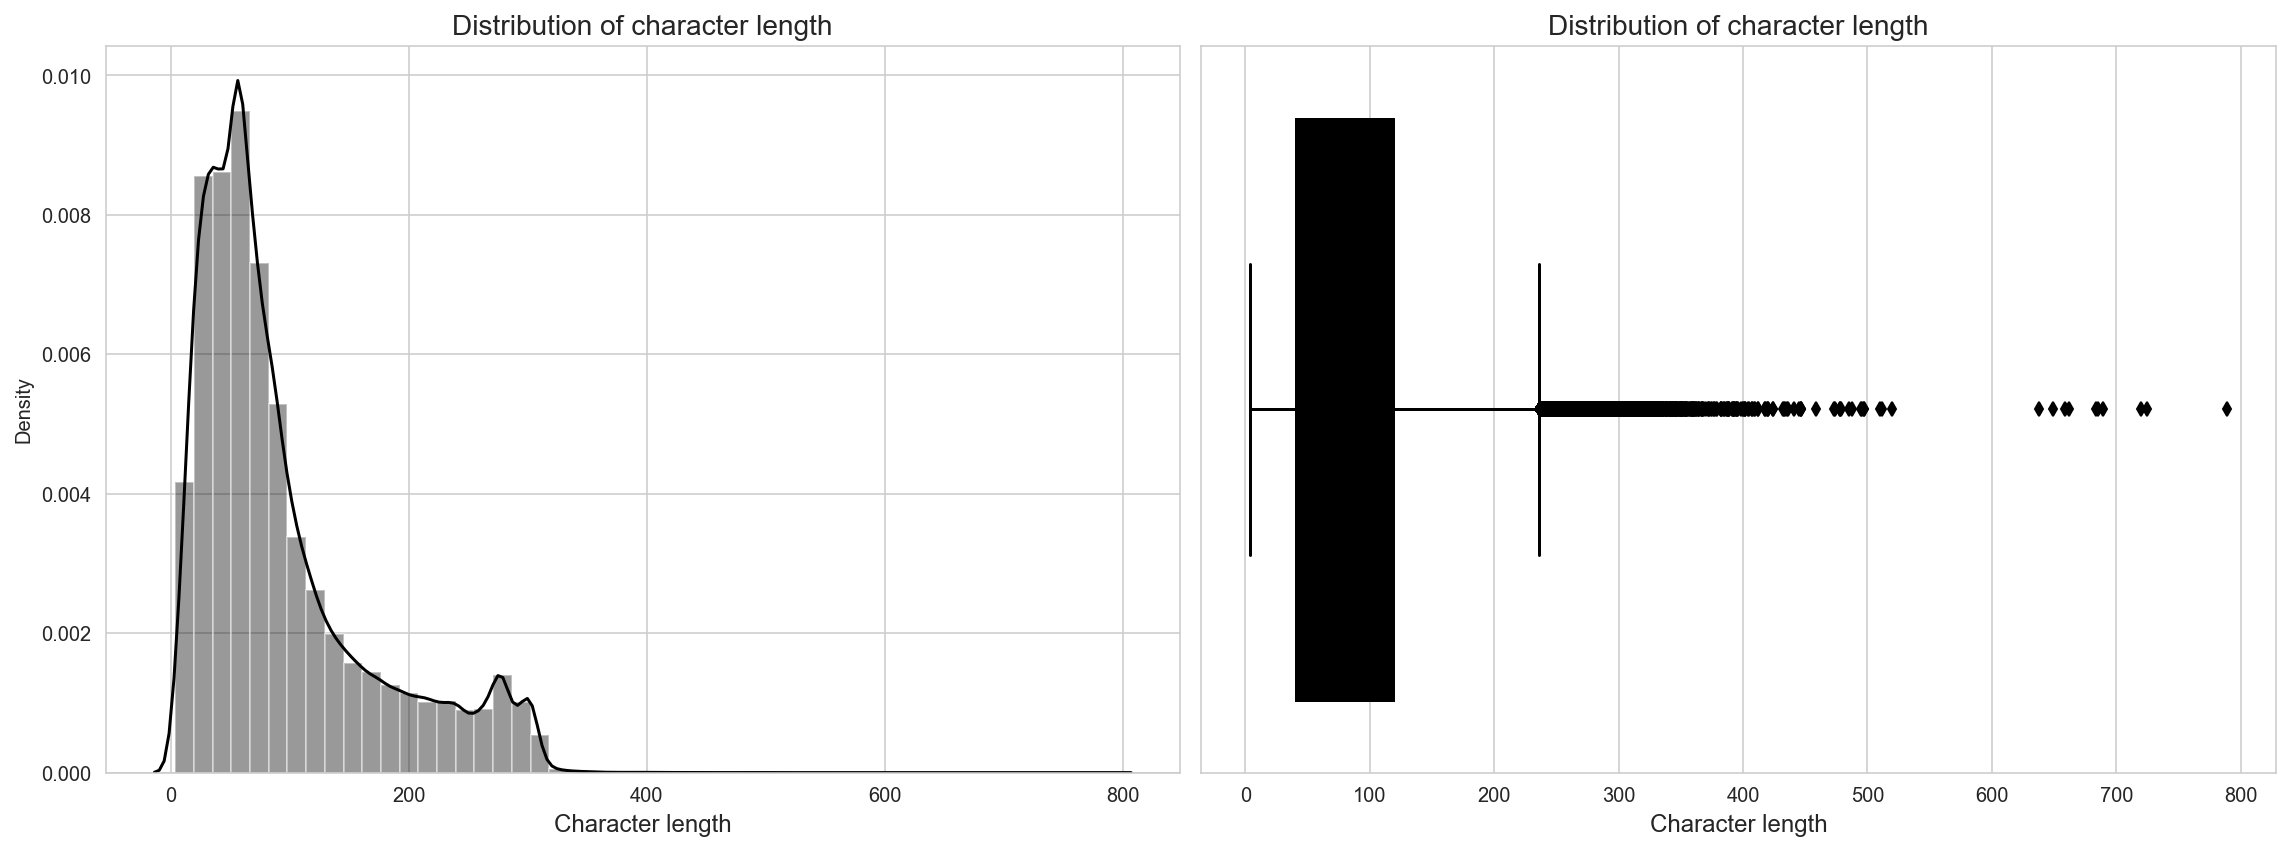

In [41]:
# view the distribution for char_length
plot_charts('char_length', 'k', 'Character length', 'Distribution of character length')

On average, each tweet has a mean length of 93 characters (with spaces included). However, various outliers exist, in which the tweets have a maximum character length of 789.

In [42]:
# view the tweet that has the highest char_length
sg_tweets_en_df[sg_tweets_en_df['char_length']==789]

,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near,date_only,month,year,hour,char_length,word_count,num_hashtag,num_mentions
296562,1387714722569494533,2021-04-29 18:25:47,@carol_jauregui @carlesmarsal @4kMiky @_DKDNZ_...,en,"[nftcommunity, nftcollectors, nftdrop]",1372613128832307201,thewanone,5,0,0,Singapore,2021-04-29,4,2021,18,789,66,3,50


This is the same tweet that has one of the highest number of mentions, for replying to a Twitter conversation. What this implies is that while the user may have adhered to the 280 character limit on Twitter, webscraped tweets contain all user mentions in the tweets' replies. Once again, all user mentions will need to be removed during preprocessing.

#### 3.5.2 Viewing the distribution for `word_count`

count    314576.000000
mean         13.974172
std          11.496327
min           1.000000
25%           6.000000
50%          10.000000
75%          18.000000
max          77.000000
Name: word_count, dtype: float64


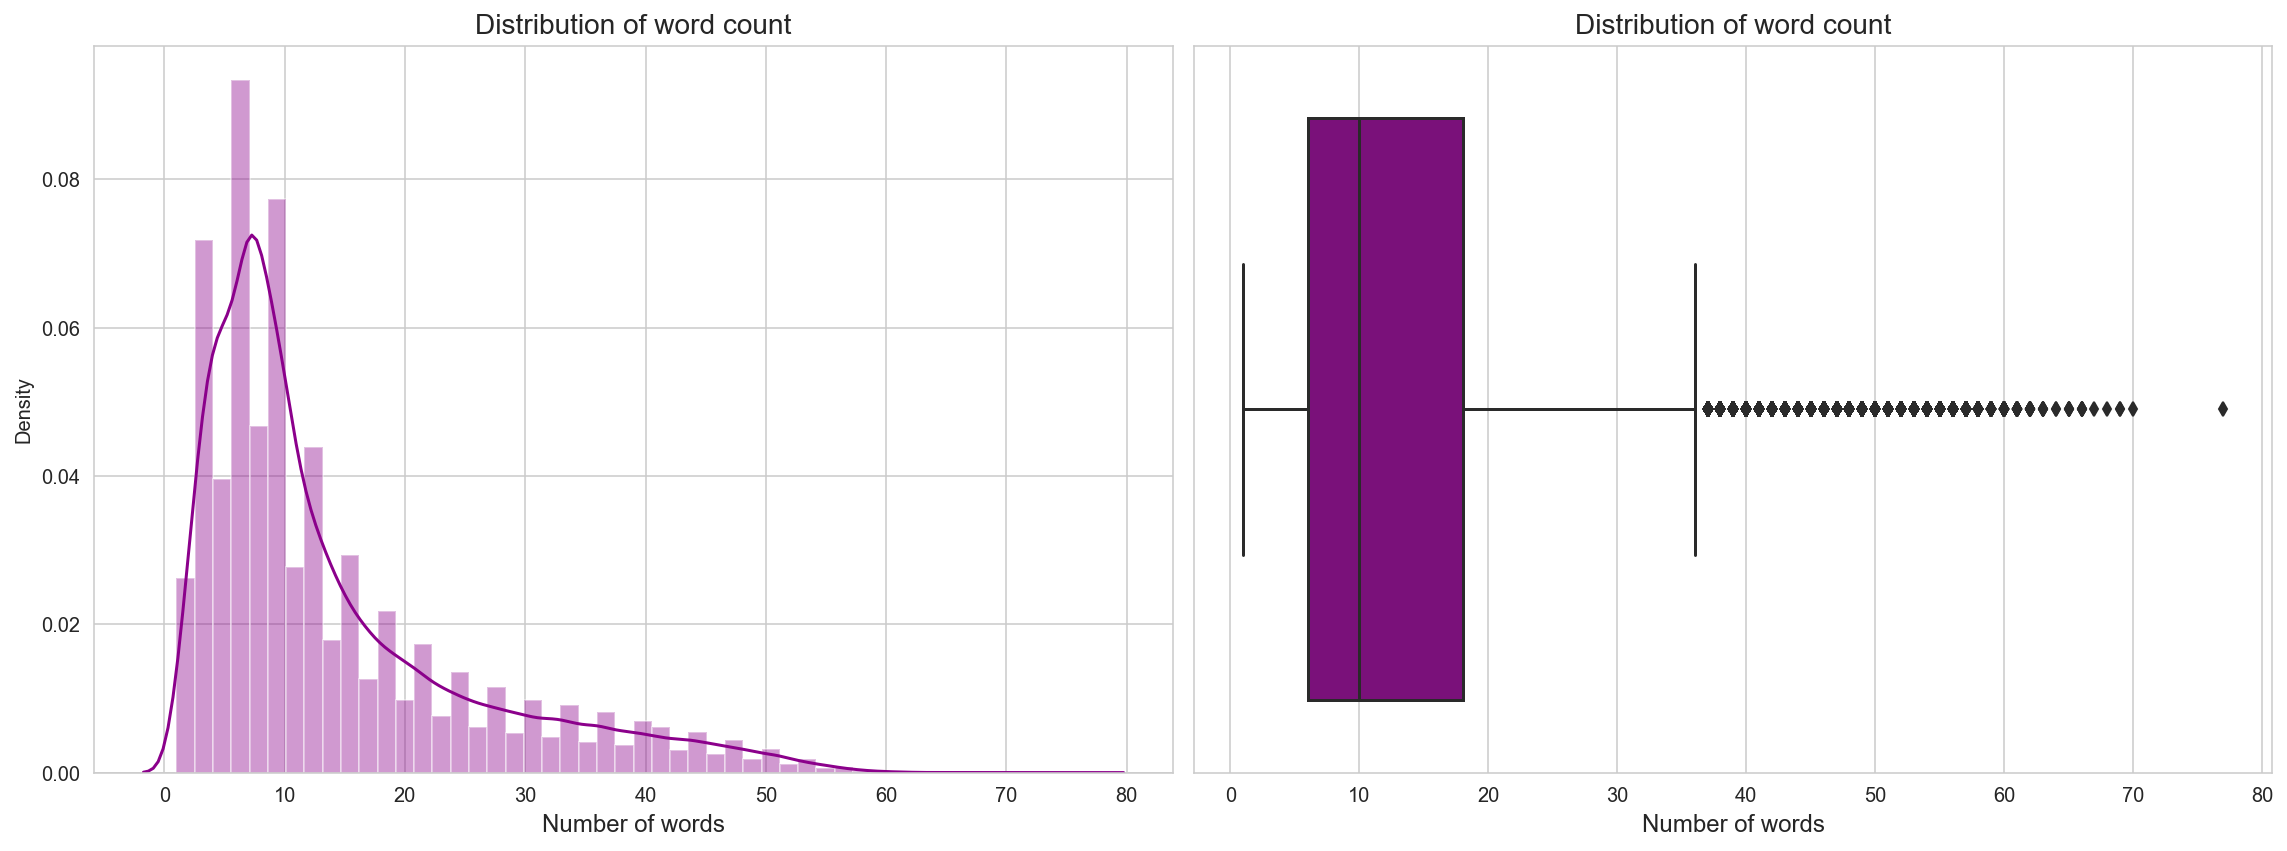

In [43]:
# view the distribution for word_count
plot_charts('word_count', 'darkmagenta', 'Number of words', 'Distribution of word count')

While there are no restrictions on the number of words used, the limit of 280 characters (with spaces included) for each tweet will undeniably affect the choice of words used. 

Generally, each tweet contains a mean number of 14 words, with outliers leading up to 77 words.  

In [44]:
# view the tweet that has the highest word_count
sg_tweets_en_df[sg_tweets_en_df['word_count']==77]

,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near,date_only,month,year,hour,char_length,word_count,num_hashtag,num_mentions
199133,1356430181049618432,2021-02-02 10:32:11,@DJZJCZ @BLUE_W0LVERINE @poptart9797 @Fah_Lo_M...,en,[],1338776283686137862,SiCheng16785036,2,1,3,Singapore,2021-02-02,2,2021,10,689,77,0,31


Similar to the previous tweet with the highest character length, the act of replying to an original Twitter converation would have multiple users being captured in the same tweet, thus inflating the tweet's word count. 

### 4. Further Data Cleaning & Visualization

In this section, I will be using the insights obtained from the earlier Exploratory Data Analysis section, to clean and process the tweets further. 

As Sentiment Analysis and Topic Modelling may require different handling and cleaning procedures, further preprocessing will be carried out in the respective notebooks, such as removing stop words, tokenizing and lemmatizing the texts.

### 4.1 Creating a new column of `cleaned_tweet`

To process the tweets, some of the steps to be taken include:   
- Remove user mentions (@) and hashtags (#).
- Remove retweets (RT).
- Remove hyperlinks (http).
- Remove non-alphabet words, i.e. digits, punctuations, etc.
- Remove single characters in the text.
- Change all words to lower case.

In [45]:
# create a function to remove the mention, hashtag, retweet info and url from each tweet
def clean_tweet_text(text):
    text = re.sub(r'@[^\s]+', '', text)                    # remove mention 
    text = re.sub(r'\B#\S+', '', text)                     # remove hashtag 
    text = re.sub(r'RT[\s]+', '', text)                    # remove retweet
    text = re.sub(r'http\S+', '', text)                    # remove url   
    text = re.sub('[^A-Za-z]+', ' ', text)                 # remove non-alphabet words
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)            # remove all single characters in the text
    text = text.lower()                                    # change to lower case
    return text

# apply the function in the new column for cleaned tweets
sg_tweets_en_df['cleaned_tweet'] = sg_tweets_en_df['tweet'].transform(clean_tweet_text)

In [46]:
# reset the index
sg_tweets_en_df.reset_index(drop=True, inplace=True)

In [47]:
# view the first five rows
sg_tweets_en_df.head()

,id,date,tweet,language,hashtags,user_id,username,nlikes,nreplies,nretweets,near,date_only,month,year,hour,char_length,word_count,num_hashtag,num_mentions,cleaned_tweet
0,1355666922210164738,2021-01-31 07:59:15,@zettodot Haha! I know who you feel!,en,[],1269471373912535040,AuraGuardians2,1,0,0,Singapore,2021-01-31,1,2021,7,36,7,0,1,haha know who you feel
1,1355666319224397824,2021-01-31 07:56:52,Trained and smashed the pads and bags so hard ...,en,[],2252140291,EfashaKamarudin,1,0,0,Singapore,2021-01-31,1,2021,7,143,25,0,0,trained and smashed the pads and bags so hard ...
2,1355665910283948036,2021-01-31 07:55:14,@zettodot I checking with you all. Excalty lev...,en,[],1269471373912535040,AuraGuardians2,1,1,0,Singapore,2021-01-31,1,2021,7,80,16,0,1,checking with you all excalty level to max al...
3,1355664963931570178,2021-01-31 07:51:29,Breakfast https://t.co/gN80tfjySA,en,[],971573083483004929,nenipuspitasar_,1,0,0,Singapore,2021-01-31,1,2021,7,34,2,0,0,breakfast
4,1355664076957880320,2021-01-31 07:47:57,@zettodot Don't give up until the event end!,en,[],1269471373912535040,AuraGuardians2,1,0,0,Singapore,2021-01-31,1,2021,7,44,8,0,1,don give up until the event end


In [48]:
# export to csv
sg_tweets_en_df.to_csv('../datasets/sg_tweets_cleaned_2021.csv', index=False)

### 4.2 Visualizing the commonly occurring words in `cleaned_tweet`

With the new column containing the cleaned tweets, I'm keen to find out what are the commonly occuring one-word, two-word and three-word phrases.

In [49]:
# convert the cleaned_tweet into a list
sg_tweet_list = sg_tweets_en_df['cleaned_tweet'].tolist()

In [50]:
# create a function to extract the commonly occurring words
def plot_top_words(tweet, ngram_range, top, first_word=''):
    
    # instantiate countvectorizer
    cvec = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = cvec.fit_transform(tweet)    
    words = pd.DataFrame(X.sum(axis=0), columns=cvec.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    result = words[words['index'].apply(lambda x: first_word in x)].head(top)
    
    # plot chart
    plt.figure(figsize=(16,6))
    plt.title(f'Top 20 commonly occurring {ngram_range} words', fontsize=14)
    ax = sns.barplot(x='index', y=0, data=result, palette='viridis')
    ax.set(xlabel='Commonly occuring words', ylabel='Count of words')
    ax.tick_params(axis='x', rotation=90)

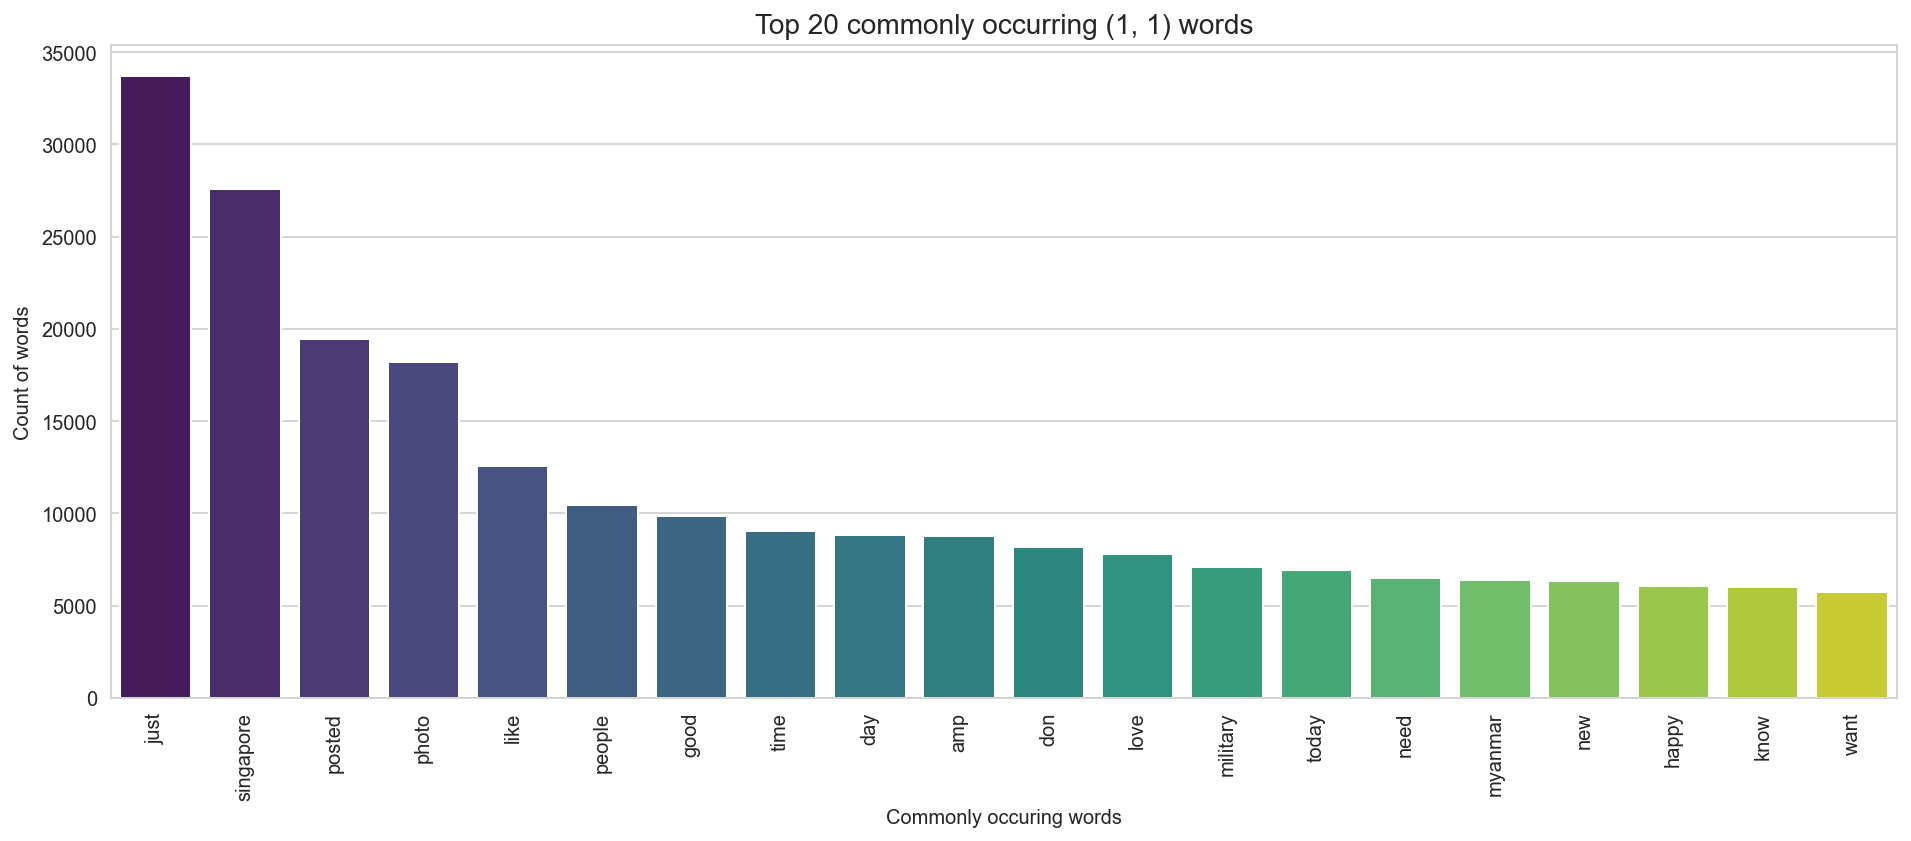

In [51]:
# create ngram_range of 1,1
plot_top_words(sg_tweet_list, ngram_range=(1,1), top=20)

From the top commonly occurring one-word, we observe some similarity between these words and those that appear in the top hashtags, such as **'singapore', 'coup', 'whatshappeninginmyanmar', 'military' and 'myanmar'**. Clearly, global affairs such as the military coup in Myanmar is at the top of mind of users in Singapore, with more than 200,000 Myanmar nationals residing here (source: [Tan, Feb 2021](https://www.straitstimes.com/singapore/myanmar-nationals-in-singapore-show-support-by-spreading-awareness-and-giving-financial)).

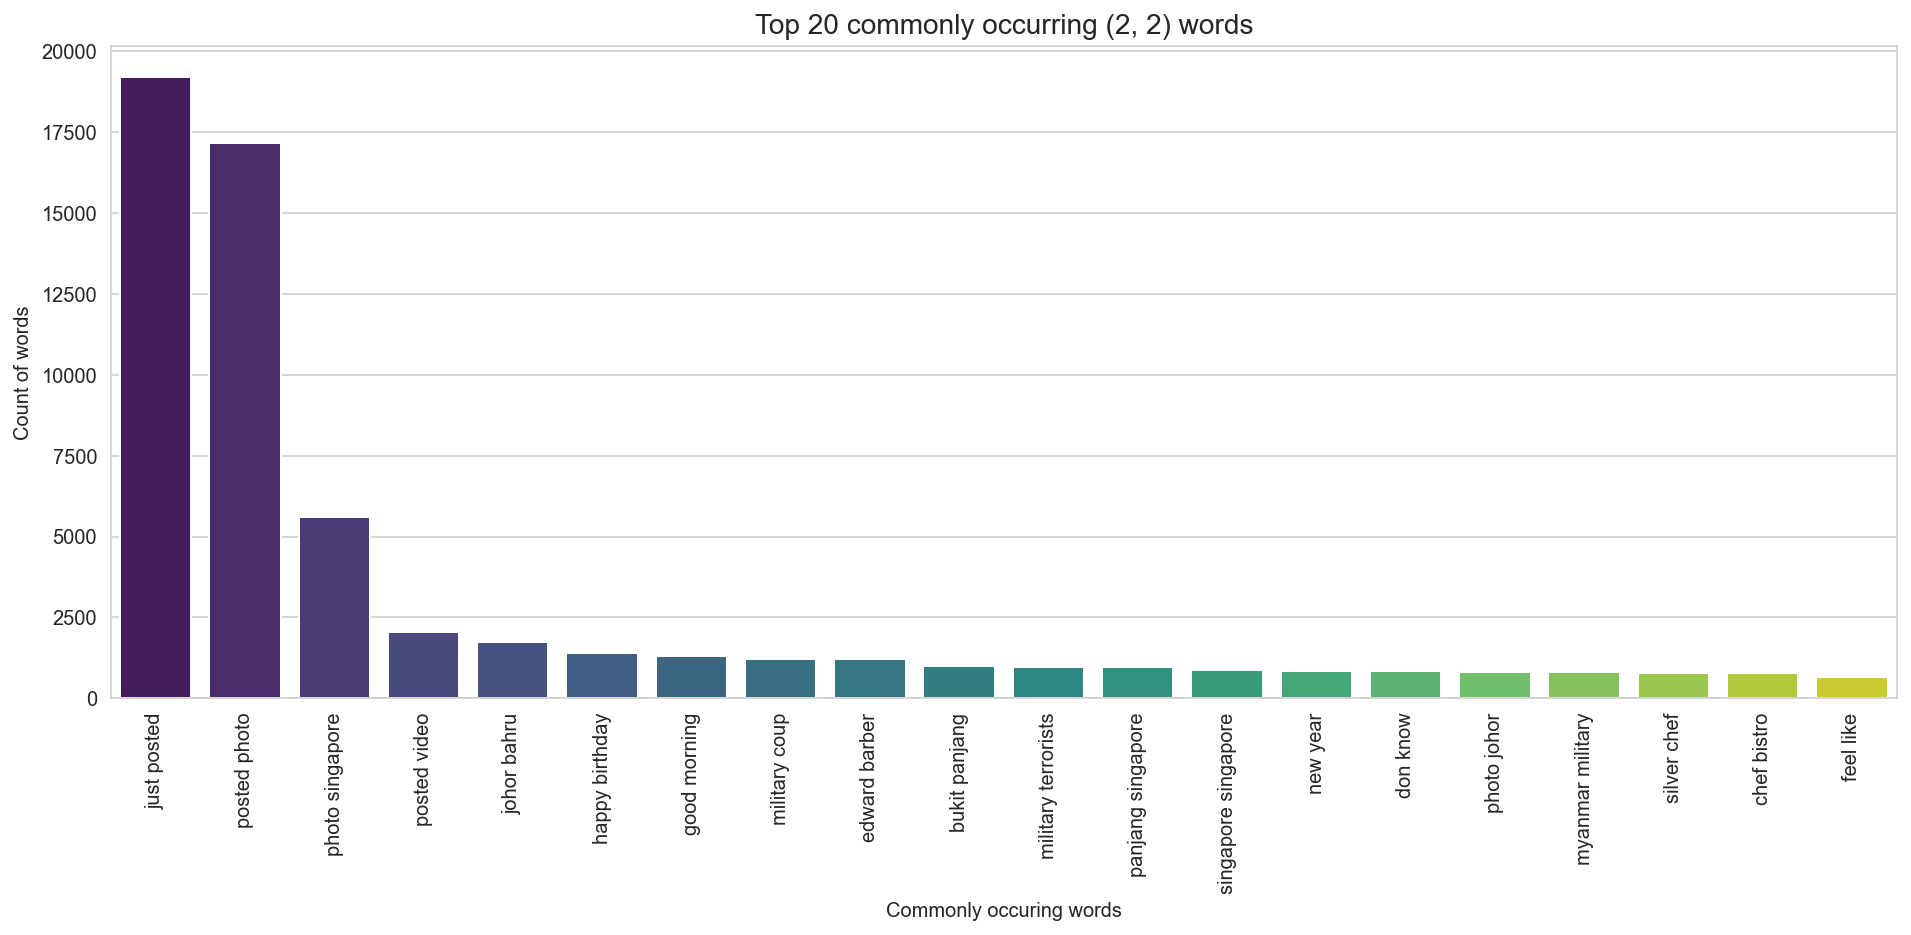

In [52]:
# create ngram_range of 2,2
plot_top_words(sg_tweet_list, ngram_range=(2,2), top=20)

Similar to the top commonly occurring one-word, we observe some similarity between the top commonly occurring two-word phrases with those that appear in the top hashtags, such as **'zerowaste free', 'singapore zerowaste', 'coup whatshappeninginmyanmar', 'whatshappeninginmyanmar mar', 'whatshappeninginmyanmar apr', 'whatshappeninginmyanmar feb', 'military coup', 'edward barber' and 'mayward edwardbarber'**.

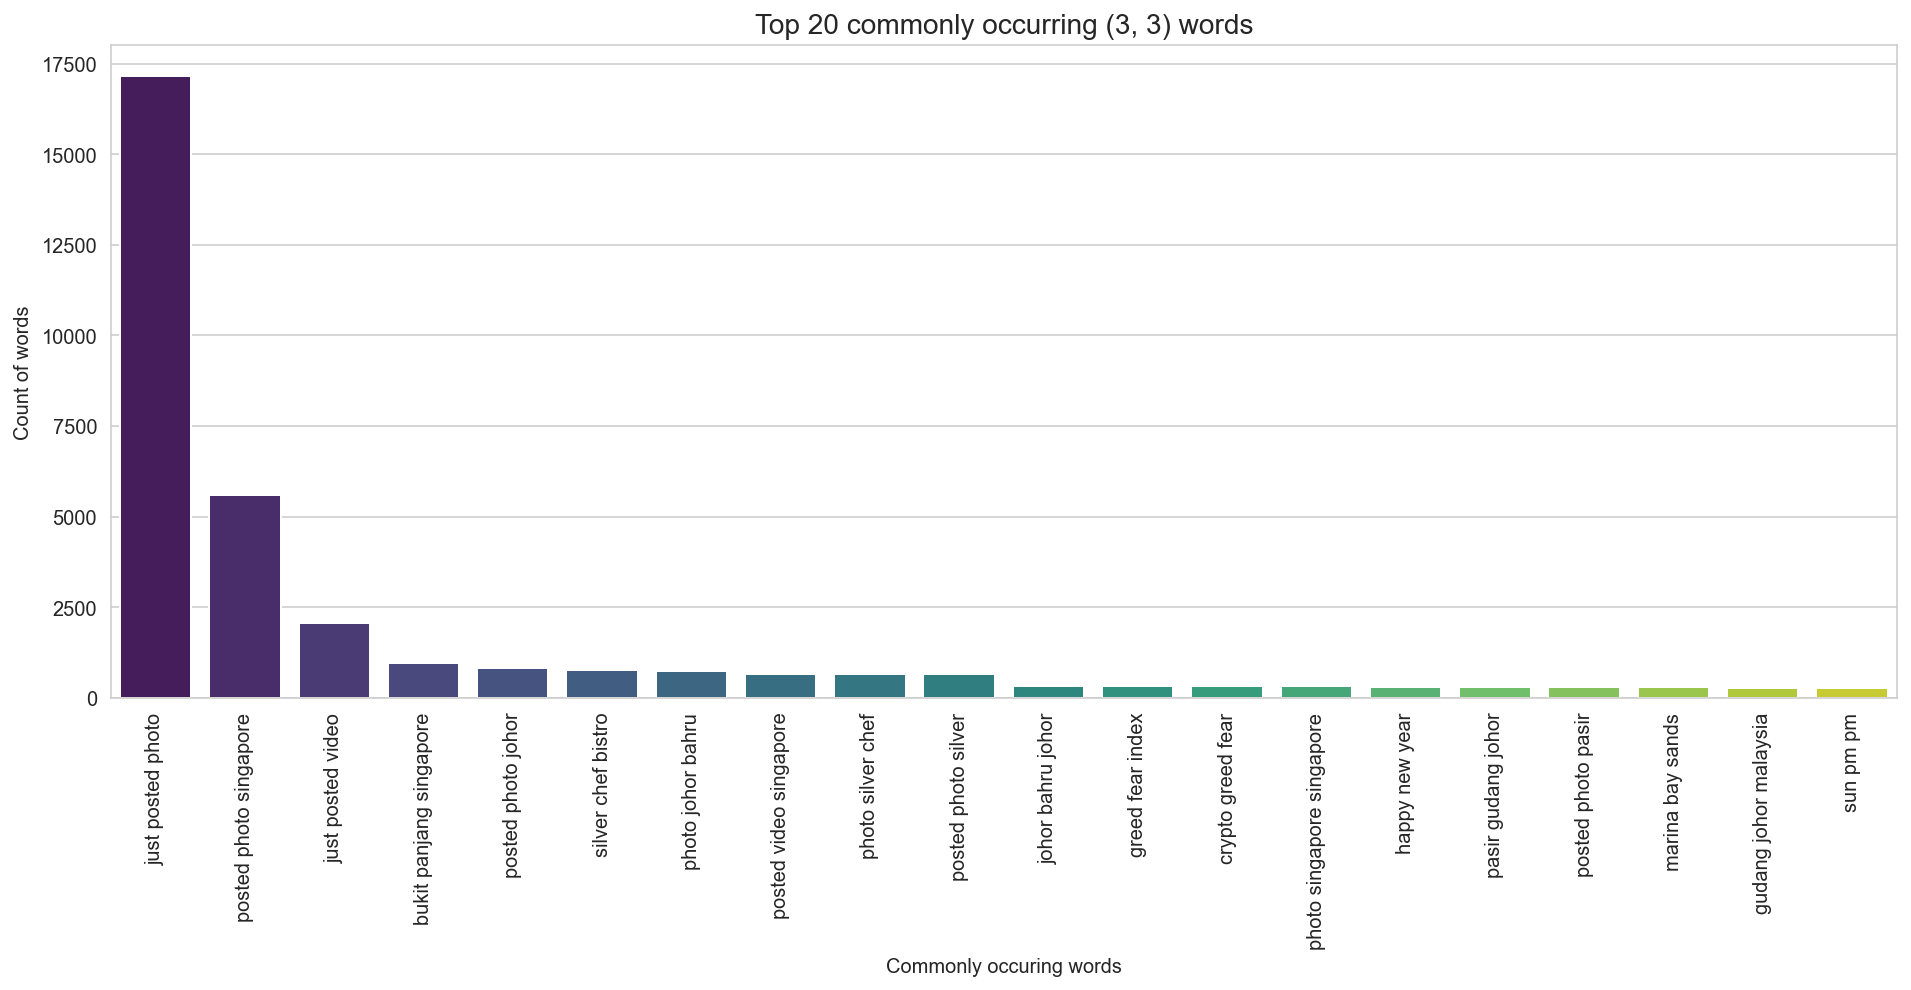

In [53]:
# create ngram_range of 3,3
plot_top_words(sg_tweet_list, ngram_range=(3,3), top=20)

Similar trends can be observed in the top commonly occurring three-word phrases, though there seems to be more reference to **'photo'** here, for example, **'just posted photo', 'posted photo singapore', 'just posted video', 'posted photo johor', 'photo johor bahru', 'posted photo silver'**. 

A search on Twitter shows that when user posts a photo/video on his/her social media accounts that are linked to Twitter, the photo/video will also be posted on Twitter. Terms such as 'just posted photo' and 'just posted video' may need to be removed for topic modelling, though it is also likely that these terms may be classified as a topic on its own. 


<img src='../images/just_posted_photo.JPG' width=450 align=center> 
<img src='../images/just_posted_video.JPG' width=450 align=center>

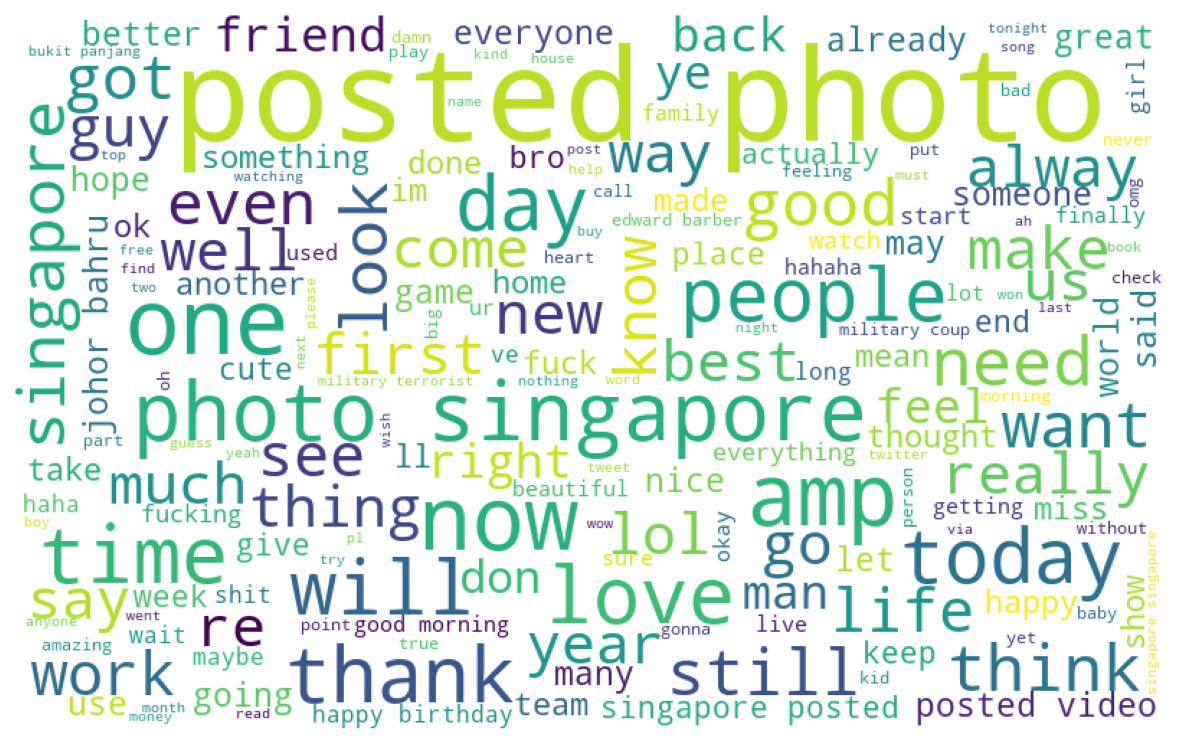

In [54]:
# create a wordcloud to visualize the top commonly ocurring words
temp_list =' '.join(sg_tweet_list)
wordcloud = WordCloud(width=800, height=500, 
                      background_color='white',
                      min_font_size=10).generate(temp_list)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad=0) 
  
plt.show('png')

From the word cloud, it seems that one-word may not be effective in the identification of topics; bigrams can be created to enhance the interpretability.

In the [next notebook](./03-1_preprocessing_and_sentiment_analysis.ipynb), I will be conducting a Sentiment Analysis for the cleaned tweets to understand the sentiment towards life in the "new normal".